# Data Analysis On Netflix Dataset 

#### Importing Required Libraries

## Data Processing and Cleaning

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import datetime as dt
%matplotlib inline
from api_keys import omdb_api_key 
import requests
import plotly
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS


In [87]:
csv_file = "data/netflix_titles.csv"
netflix_data_df = pd.read_csv(csv_file)
netflix_data_df.head(10)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
5,80163890,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
8,80117902,TV Show,Fire Chasers,NaN,NaN,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...


In [90]:
#renaming two columns (type and listed_in) 
netflix_data_df.rename(columns = {'type':'entertainmen type', 'listed_in':'genre'}, inplace = True)
netflix_data_df

,show_id,entertainment_type,title,director,cast,country,date_added,release_year,rating,duration,genre,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [91]:
##searching for all null values within this dataset
#we are going to add values in null for country, rating, and date added

netflix_data_df.isnull().sum()

show_id                  0
entertainment_type       0
title                    0
director              1969
cast                   570
country                476
date_added              11
release_year             0
rating                  10
duration                 0
genre                    0
description              0
dtype: int64

In [92]:
#counting the number of countries
country_count= netflix_data_df['country'].value_counts()
country_count


United States                                    2032
India                                             777
United Kingdom                                    348
Japan                                             176
Canada                                            141
                                                 ... 
India, Japan                                        1
Norway, Germany, Sweden                             1
United Kingdom, Canada, France, United States       1
United Arab Emirates, Jordan                        1
Cyprus, Austria, Thailand                           1
Name: country, Length: 554, dtype: int64

In [93]:
#replaced the null values with "united states"
netflix_data_df['country'].replace(np.nan, 'United States',inplace  = True)
netflix_data_df

,show_id,entertainment_type,title,director,cast,country,date_added,release_year,rating,duration,genre,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,United States,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [94]:
#checking to reconfirm no null values in country column
netflix_data_df.isnull().sum()

show_id                  0
entertainment_type       0
title                    0
director              1969
cast                   570
country                  0
date_added              11
release_year             0
rating                  10
duration                 0
genre                    0
description              0
dtype: int64

In [95]:
#counting the highest rating based on the number of movies which is TV-MA and we will use this rating to fill any null values
#in rating column
rating_count= netflix_data_df['rating'].value_counts()
rating_count

TV-MA       2027
TV-14       1698
TV-PG        701
R            508
PG-13        286
NR           218
PG           184
TV-Y7        169
TV-G         149
TV-Y         143
TV-Y7-FV      95
G             37
UR             7
NC-17          2
Name: rating, dtype: int64

In [96]:
#filling null values in rating with TV-MA
netflix_data_df['rating'].replace(np.nan, 'TV-MA',inplace  = True)
netflix_data_df

,show_id,entertainment_type,title,director,cast,country,date_added,release_year,rating,duration,genre,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,United States,NaN,2016,TV-MA,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [97]:
#replaced the null values in date_added column with "1/1/2020"
netflix_data_df["date_added"] = netflix_data_df["date_added"].fillna("1/1/2020")
netflix_data_df

,show_id,entertainment_type,title,director,cast,country,date_added,release_year,rating,duration,genre,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,1/1/2020,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,1/1/2020,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,United States,1/1/2020,2016,TV-MA,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,1/1/2020,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [98]:
#reconfirming the date_added has no null values
netflix_data_df.isnull().sum()

show_id                  0
entertainment_type       0
title                    0
director              1969
cast                   570
country                  0
date_added               0
release_year             0
rating                   0
duration                 0
genre                    0
description              0
dtype: int64

In [99]:
#creating a new column for date_added and keeping the format to years only
netflix_data_df["date_added"] = netflix_data_df["date_added"].str.strip()
netflix_data_df['year_added']=pd.DatetimeIndex(netflix_data_df['date_added']).year


netflix_data_df

,show_id,entertainment_type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,year_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",2018
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,2018
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,1/1/2020,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",2020
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,1/1/2020,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews...",2020
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,United States,1/1/2020,2016,TV-MA,60 min,Movies,Nursery rhymes and original music for children...,2020
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,1/1/2020,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ...",2020


In [100]:
netflix_data_df = netflix_data_df.drop(netflix_data_df.columns[[3, 4, 6, 11]], axis=1)
netflix_data_df

#removed director, cast, date_added, and description (uneccessary and too many null values)

,show_id,entertainment_type,title,country,release_year,rating,duration,genre,year_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"United States, India, South Korea, China",2019,TV-PG,90 min,"Children & Family Movies, Comedies",2019
1,80117401,Movie,Jandino: Whatever it Takes,United Kingdom,2016,TV-MA,94 min,Stand-Up Comedy,2016
2,70234439,TV Show,Transformers Prime,United States,2013,TV-Y7-FV,1 Season,Kids' TV,2018
3,80058654,TV Show,Transformers: Robots in Disguise,United States,2016,TV-Y7,1 Season,Kids' TV,2018
4,80125979,Movie,#realityhigh,United States,2017,TV-14,99 min,Comedies,2017
...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,United States,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...",2020
6230,70286564,TV Show,Maron,United States,2016,TV-MA,4 Seasons,TV Comedies,2020
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,United States,2016,TV-MA,60 min,Movies,2020
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,United Kingdom,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas",2020


In [101]:
netflix_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   show_id             6234 non-null   int64 
 1   entertainment_type  6234 non-null   object
 2   title               6234 non-null   object
 3   country             6234 non-null   object
 4   release_year        6234 non-null   int64 
 5   rating              6234 non-null   object
 6   duration            6234 non-null   object
 7   genre               6234 non-null   object
 8   year_added          6234 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 438.5+ KB


In [102]:
netflix_data_df["imdb_rating"] = ''

In [103]:
endpoint = "http://www.omdbapi.com/?"
endpoint = f"{endpoint}apikey={omdb_api_key}"
print(endpoint)

http://www.omdbapi.com/?apikey=db86ac2f


In [17]:
#url = "http://www.omdbapi.com/?apikey=omdb_api_key&t=Norm%20of%20the%20North:%20King%20Sized%20Adventure&y=2019"

title = "Norm%20of%20the%20North:%20King%20Sized%20Adventure"
year = "2019"
url = f"{endpoint}&t={title}&y={year}"
print(url)
res = requests.get(url)
print(res.json())

http://www.omdbapi.com/?apikey=db86ac2f&t=Norm%20of%20the%20North:%20King%20Sized%20Adventure&y=2019
{'Title': 'Norm of the North: King Sized Adventure', 'Year': '2019', 'Rated': 'Not Rated', 'Released': '02 Aug 2019', 'Runtime': '90 min', 'Genre': 'Animation, Adventure, Comedy', 'Director': 'Richard Finn, Tim Maltby', 'Writer': 'Dean Stefan, Daniel Altiere, Steven Altiere', 'Actors': 'Alan Marriott, Andrew Toth, Brian Dobson', 'Plot': 'An ancient Chinese artifact has been stolen by a villainous archaeologist named Dexter. With the help of his Lemming friends, Norm must keep his word and embark on a journey across the world to help recover the artifact for the pe...', 'Language': 'English', 'Country': 'United States, India, South Korea, China', 'Awards': 'N/A', 'Poster': 'https://m.media-amazon.com/images/M/MV5BNjMwZDhhZWYtOTM0OC00ZTQzLWIyNDktNDM1NmVkYTY4NWNlXkEyXkFqcGdeQXVyNTYyNDUxMDc@._V1_SX300.jpg', 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '3.3/10'}], 'Metascore': 

In [105]:

for index, row in netflix_data_df.iterrows():
    print(row['title'], row['release_year'], row['imdb_rating'])
    title = row['title']
    year = row['release_year']
    url = f"{endpoint}&t={title}&y={year}"
    print(url)
    try:
        res = requests.get(url).json()
        imdb_rating = res['imdbRating']
        netflix_data_df['imdb_rating'][index] = imdb_rating
    except:
        imdb_rating = np.nan
        netflix_data_df['imdb_rating'][index] = imdb_rating
    print(imdb_rating)
    


Norm of the North: King Sized Adventure 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Norm of the North: King Sized Adventure&y=2019
3.3
Jandino: Whatever it Takes 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Jandino: Whatever it Takes&y=2016


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10700\4030734281.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_data_df['imdb_rating'][index] = imdb_rating


4.6
Transformers Prime 2013 
http://www.omdbapi.com/?apikey=db86ac2f&t=Transformers Prime&y=2013
7.4
Transformers: Robots in Disguise 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Transformers: Robots in Disguise&y=2016


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10700\4030734281.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_data_df['imdb_rating'][index] = imdb_rating


nan
#realityhigh 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=#realityhigh&y=2017
nan
Apaches 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Apaches&y=2016
nan
Automata 2014 
http://www.omdbapi.com/?apikey=db86ac2f&t=Automata&y=2014
6.0
Fabrizio Copano: Solo pienso en mi 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Fabrizio Copano: Solo pienso en mi&y=2017
4.8
Fire Chasers 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Fire Chasers&y=2017
6.6
Good People 2014 
http://www.omdbapi.com/?apikey=db86ac2f&t=Good People&y=2014
5.5
Joaquín Reyes: Una y no más 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Joaquín Reyes: Una y no más&y=2017
N/A
Kidnapping Mr. Heineken 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Kidnapping Mr. Heineken&y=2015
6.1
Krish Trish and Baltiboy 2009 
http://www.omdbapi.com/?apikey=db86ac2f&t=Krish Trish and Baltiboy&y=2009
nan
Krish Trish and Baltiboy: Battle of Wits 2013 
http://www.omdbapi.com/?apikey=db86ac2f&t=Krish Trish and Baltiboy: Battle of Wits&y

6.2
5CM 2012 
http://www.omdbapi.com/?apikey=db86ac2f&t=5CM&y=2012
N/A
Animal World 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Animal World&y=2018
6.4
Hold the Dark 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Hold the Dark&y=2018
5.6
Lessons from a School Shooting: Notes from Dunblane 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Lessons from a School Shooting: Notes from Dunblane&y=2018
nan
Made in Mexico 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Made in Mexico&y=2018
3.9
Single 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Single&y=2015
6.7
The 3rd Eye 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=The 3rd Eye&y=2018
N/A
The Sinking Of Van Der Wijck 2013 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Sinking Of Van Der Wijck&y=2013
7.6
Two Catalonias 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Two Catalonias&y=2018
6.4
Bobby Sands: 66 Days 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Bobby Sands: 66 Days&y=2016
7.2
Bard of Blood 2019 
http://www.omdbapi.com

5.5
Kabir Singh 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Kabir Singh&y=2019
7.0
Océans 2009 
http://www.omdbapi.com/?apikey=db86ac2f&t=Océans&y=2009
7.7
The Endless 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Endless&y=2017
6.5
Transformers: Rescue Bots 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Transformers: Rescue Bots&y=2016
nan
Jerry Before Seinfeld 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Jerry Before Seinfeld&y=2017
7.0
Manhunt 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Manhunt&y=2017
8.1
Karol Modzelewski, Łukasz „Lotek” Lodkowski No Offense 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Karol Modzelewski, Łukasz „Lotek” Lodkowski No Offense&y=2016
nan
Katarzyna Piasecka, Rafał Pacześ Seriously Funny 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Katarzyna Piasecka, Rafał Pacześ Seriously Funny&y=2016
nan
Mariusz Kałamaga, Karol Kopiec, Wiolka Walaszczyk Hilarious Trio 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Mariusz Kałamaga, Karol Kopie

6.3
Boca Juniors Confidential 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Boca Juniors Confidential&y=2018
6.4
Car Masters: Rust to Riches 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Car Masters: Rust to Riches&y=2018
8.4
Norm Macdonald Has a Show 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Norm Macdonald Has a Show&y=2018
8.5
Still 2010 
http://www.omdbapi.com/?apikey=db86ac2f&t=Still&y=2010
4.3
Super Monsters Monster Party 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Super Monsters Monster Party&y=2018
nan
The Angel 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Angel&y=2018
6.6
The Land of Steady Habits 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Land of Steady Habits&y=2018
6.2
The Rise of Phoenixes 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Rise of Phoenixes&y=2018
8.4
American Warfighter 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=American Warfighter&y=2019
nan
Deviant Love 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Deviant Love&y=201

6.4
Stephanie 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Stephanie&y=2017
5.8
Terrifier 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Terrifier&y=2017
nan
The Keeping Hours 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Keeping Hours&y=2017
6.3
The Perfect Day 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Perfect Day&y=2018
N/A
The Promise 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Promise&y=2017
5.9
The River Wild 1994 
http://www.omdbapi.com/?apikey=db86ac2f&t=The River Wild&y=1994
6.5
The Road to Calvary 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Road to Calvary&y=2017
7.7
최강전사 미니특공대 : 영웅의 탄생 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=최강전사 미니특공대 : 영웅의 탄생&y=2018
nan
A Boy Name Flora A 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=A Boy Name Flora A&y=2017
nan
A House of Blocks 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=A House of Blocks&y=2017
nan
Aakhri Adaalat 1988 
http://www.omdbapi.com/?apikey=db86ac2f&t=Aakhri Adaalat&y=1988
5.4
A

6.9
The Spooky Tale of Captain Underpants Hack-a-ween 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Spooky Tale of Captain Underpants Hack-a-ween&y=2019
5.9
Pulang 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Pulang&y=2018
6.7
The Water Diviner 2014 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Water Diviner&y=2014
7.0
Chris Brown: Welcome to My Life 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Chris Brown: Welcome to My Life&y=2017
5.6
13TH 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=13TH&y=2016
8.2
Russell Peters: Almost Famous 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Russell Peters: Almost Famous&y=2016
6.6
StoryBots Super Songs 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=StoryBots Super Songs&y=2016
8.8
The Siege of Jadotville 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Siege of Jadotville&y=2016
7.2
Love for Sale 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Love for Sale&y=2018
7.4
Jackpot 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Jackp

6.1
Beyond Stranger Things 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Beyond Stranger Things&y=2017
7.4
Joan Didion: The Center Will Not Hold 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Joan Didion: The Center Will Not Hold&y=2017
7.5
7 años 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=7 años&y=2016
nan
Manson Family Vacation 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Manson Family Vacation&y=2015
5.8
A Little Thing Called First Love 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=A Little Thing Called First Love&y=2019
7.9
The Last Whistle 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Last Whistle&y=2019
5.0
Been So Long 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Been So Long&y=2018
5.5
Dovlatov 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Dovlatov&y=2018
6.4
Incoming 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Incoming&y=2019
N/A
Jefe 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Jefe&y=2018
5.5
Santo Cachón 2018 
http://www.omdbapi.com/?apikey=db

nan
Ghost Town Gold 2012 
http://www.omdbapi.com/?apikey=db86ac2f&t=Ghost Town Gold&y=2012
7.0
Horror Homes 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Horror Homes&y=2016
nan
Kitten Rescuers 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Kitten Rescuers&y=2017
nan
License to Drill: Louisiana 2014 
http://www.omdbapi.com/?apikey=db86ac2f&t=License to Drill: Louisiana&y=2014
6.5
Living Undocumented 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Living Undocumented&y=2019
6.9
Ready to Mingle 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Ready to Mingle&y=2019
5.9
Salam - The First ****** Nobel Laureate 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Salam - The First ****** Nobel Laureate&y=2018
7.8
Death Race: Beyond Anarchy 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Death Race: Beyond Anarchy&y=2017
nan
Eric ldle's What About Dick? 2012 
http://www.omdbapi.com/?apikey=db86ac2f&t=Eric ldle's What About Dick?&y=2012
nan
Joe Rogan: Strange Times 2018 
http://www.omdbapi.com/?

7.0
Laws of Attraction 2012 
http://www.omdbapi.com/?apikey=db86ac2f&t=Laws of Attraction&y=2012
N/A
Lucknow Central 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Lucknow Central&y=2017
6.2
A Family Affair 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=A Family Affair&y=2015
7.1
Anthony Jeselnik: Thoughts and Prayers 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Anthony Jeselnik: Thoughts and Prayers&y=2015
7.7
Beasts of No Nation 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Beasts of No Nation&y=2015
7.7
Circle 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Circle&y=2015
6.0
Black Money Love 2014 
http://www.omdbapi.com/?apikey=db86ac2f&t=Black Money Love&y=2014
7.5
Dark Crimes 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Dark Crimes&y=2016
4.7
Homeland 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Homeland&y=2019
N/A
Magical Andes 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Magical Andes&y=2019
nan
Power Rangers Beast Morphers 2019 
http://www.omdbapi.com/?apikey=db

6.6
The Forest of Love 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Forest of Love&y=2019
6.3
The Influence 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Influence&y=2019
N/A
Filosofi Kopi The Movie 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Filosofi Kopi The Movie&y=2015
nan
Ordinary Heroes 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Ordinary Heroes&y=2018
nan
Salt Fat Acid Heat 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Salt Fat Acid Heat&y=2018
7.7
اشتباك 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=اشتباك&y=2016
nan
Beyblade Burst Turbo 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Beyblade Burst Turbo&y=2018
nan
GEN HOSHINO STADIUM TOUR “POP VIRUS” 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=GEN HOSHINO STADIUM TOUR “POP VIRUS”&y=2019
nan
Ultramarine Magmell 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Ultramarine Magmell&y=2019
nan
22-Jul 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=22-Jul&y=2018
nan
Blood Pact 2018 
http://www.omdbapi.co

7.0
25 Kille 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=25 Kille&y=2016
5.9
A Witches' Ball 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=A Witches' Ball&y=2017
5.1
Agyaat 2009 
http://www.omdbapi.com/?apikey=db86ac2f&t=Agyaat&y=2009
3.0
Anjaan 2014 
http://www.omdbapi.com/?apikey=db86ac2f&t=Anjaan&y=2014
5.1
Bathinda Express 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Bathinda Express&y=2016
5.7
Brooklyn's Finest 2009 
http://www.omdbapi.com/?apikey=db86ac2f&t=Brooklyn's Finest&y=2009
6.7
Chappaquiddick 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Chappaquiddick&y=2017
6.4
Civilizations 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Civilizations&y=2018
7.7
Delhi 6 2009 
http://www.omdbapi.com/?apikey=db86ac2f&t=Delhi 6&y=2009
6.1
Dev.D 2009 
http://www.omdbapi.com/?apikey=db86ac2f&t=Dev.D&y=2009
7.9
Dil Vil Pyaar Vyaar 2014 
http://www.omdbapi.com/?apikey=db86ac2f&t=Dil Vil Pyaar Vyaar&y=2014
6.5
Dushman 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Dushman&y=2017
5.

9.3
Food: Delicious Science 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Food: Delicious Science&y=2017
7.9
For Your Own Good 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=For Your Own Good&y=2017
5.5
Franca: Chaos and Creation 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Franca: Chaos and Creation&y=2016
7.5
Frances Ha 2012 
http://www.omdbapi.com/?apikey=db86ac2f&t=Frances Ha&y=2012
7.4
Generation Iron 2 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Generation Iron 2&y=2017
6.1
Ghost Patrol 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Ghost Patrol&y=2016
5.1
Great Yellowstone Thaw 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Great Yellowstone Thaw&y=2017
7.7
I Am Bolt 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=I Am Bolt&y=2016
7.1
I'm in Love with a Church Girl 2013 
http://www.omdbapi.com/?apikey=db86ac2f&t=I'm in Love with a Church Girl&y=2013
4.2
Ice Guardians 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Ice Guardians&y=2016
7.4
Justice in the City 2012 
ht

nan
My Way 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=My Way&y=2016
nan
U Turn 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=U Turn&y=2016
nan
Damnation 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Damnation&y=2017
nan
Into the Forest 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Into the Forest&y=2015
nan
Krisha 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Krisha&y=2015
nan
Jerry Seinfeld: Comedian 2002 
http://www.omdbapi.com/?apikey=db86ac2f&t=Jerry Seinfeld: Comedian&y=2002
nan
P. King Duckling 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=P. King Duckling&y=2016
nan
The Journey Is the Destination 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Journey Is the Destination&y=2016
nan
Virunga 2014 
http://www.omdbapi.com/?apikey=db86ac2f&t=Virunga&y=2014
nan
Burning Cane 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Burning Cane&y=2019
nan
SCAMS 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=SCAMS&y=2019
nan
Shadow 2018 
http://www.omdbapi.com/?apikey=db86ac2f&

nan
Zona Rosa 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Zona Rosa&y=2019
nan
Dirty John 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Dirty John&y=2018
nan
Pranaam 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Pranaam&y=2019
nan
What the F* Is Going On? 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=What the F* Is Going On?&y=2019
nan
Harold and Lillian: A Hollywood Love Story 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Harold and Lillian: A Hollywood Love Story&y=2015
nan
My Little Pony Friendship Is Magic: Best Gift Ever 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=My Little Pony Friendship Is Magic: Best Gift Ever&y=2018
nan
Perú: Tesoro escondido 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Perú: Tesoro escondido&y=2017
nan
Beauties of the Night 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Beauties of the Night&y=2016
nan
Gilmore Girls: A Year in the Life 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Gilmore Girls: A Year in the Life&y=2016
nan
Michael Che

nan
Who Killed Little Gregory? 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Who Killed Little Gregory?&y=2019
nan
World Trade Center 2006 
http://www.omdbapi.com/?apikey=db86ac2f&t=World Trade Center&y=2006
nan
Young Adult 2011 
http://www.omdbapi.com/?apikey=db86ac2f&t=Young Adult&y=2011
nan
Yours, Mine and Ours 2005 
http://www.omdbapi.com/?apikey=db86ac2f&t=Yours, Mine and Ours&y=2005
nan
Zodiac 2007 
http://www.omdbapi.com/?apikey=db86ac2f&t=Zodiac&y=2007
nan
Kulipari: Dream Walker 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Kulipari: Dream Walker&y=2018
nan
Paap-O-Meter 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Paap-O-Meter&y=2017
nan
Puppy Star Christmas 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Puppy Star Christmas&y=2018
nan
Sabrina 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Sabrina&y=2018
nan
Target 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Target&y=2018
nan
The Final Table 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Final Table&y=2018
nan

nan
SunGanges 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=SunGanges&y=2018
nan
The 24 Hour War 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=The 24 Hour War&y=2016
nan
The Club 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Club&y=2019
nan
The Garden of Words 2013 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Garden of Words&y=2013
nan
The Stranded 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Stranded&y=2019
nan
Westside Story 2003 
http://www.omdbapi.com/?apikey=db86ac2f&t=Westside Story&y=2003
nan
Aalorukkam 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Aalorukkam&y=2018
nan
Beyblade Burst Evolution 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Beyblade Burst Evolution&y=2017
nan
Christmas Wedding Planner 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Christmas Wedding Planner&y=2017
nan
Halkaa 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Halkaa&y=2018
nan
Mala Kahich Problem Nahi 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Mala Kahich Problem Nahi&y=20

nan
Elliot the Littlest Reindeer 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Elliot the Littlest Reindeer&y=2018
nan
Enter the Dragon 1973 
http://www.omdbapi.com/?apikey=db86ac2f&t=Enter the Dragon&y=1973
nan
Euphoria 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Euphoria&y=2018
nan
Executive Decision 1996 
http://www.omdbapi.com/?apikey=db86ac2f&t=Executive Decision&y=1996
nan
Fallen 1998 
http://www.omdbapi.com/?apikey=db86ac2f&t=Fallen&y=1998
nan
Fear and Loathing in Las Vegas 1998 
http://www.omdbapi.com/?apikey=db86ac2f&t=Fear and Loathing in Las Vegas&y=1998
nan
Fire in Paradise 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Fire in Paradise&y=2019
nan
Forbidden Planet 1956 
http://www.omdbapi.com/?apikey=db86ac2f&t=Forbidden Planet&y=1956
nan
Getting Played 2005 
http://www.omdbapi.com/?apikey=db86ac2f&t=Getting Played&y=2005
nan
Gigi 1958 
http://www.omdbapi.com/?apikey=db86ac2f&t=Gigi&y=1958
nan
Gosford Park 2001 
http://www.omdbapi.com/?apikey=db86ac2f&t=Gosford Park&

nan
Christmas With A View 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Christmas With A View&y=2018
nan
Chup Chup Ke 2006 
http://www.omdbapi.com/?apikey=db86ac2f&t=Chup Chup Ke&y=2006
nan
Dhan Dhana Dhan Goal 2007 
http://www.omdbapi.com/?apikey=db86ac2f&t=Dhan Dhana Dhan Goal&y=2007
nan
Dhoondte Reh Jaoge 2009 
http://www.omdbapi.com/?apikey=db86ac2f&t=Dhoondte Reh Jaoge&y=2009
nan
Do Dooni Chaar 2010 
http://www.omdbapi.com/?apikey=db86ac2f&t=Do Dooni Chaar&y=2010
nan
Edge of Fear 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Edge of Fear&y=2018
nan
Edmilson Filho: Notas, Comedy about Relationships 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Edmilson Filho: Notas, Comedy about Relationships&y=2017
nan
Filmworker 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Filmworker&y=2017
nan
Gaddar: the Traitor 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Gaddar: the Traitor&y=2015
nan
Get Shorty 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Get Shorty&y=2017
nan
Ghanchakkar 2013

nan
Tree Man 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Tree Man&y=2015
nan
Winter of Our Dreams 1981 
http://www.omdbapi.com/?apikey=db86ac2f&t=Winter of Our Dreams&y=1981
nan
Young Tiger 1973 
http://www.omdbapi.com/?apikey=db86ac2f&t=Young Tiger&y=1973
nan
A Russell Peters Christmas 2011 
http://www.omdbapi.com/?apikey=db86ac2f&t=A Russell Peters Christmas&y=2011
nan
Aziz Ansari: Buried Alive 2013 
http://www.omdbapi.com/?apikey=db86ac2f&t=Aziz Ansari: Buried Alive&y=2013
nan
Mad Ron's Prevues from Hell 1987 
http://www.omdbapi.com/?apikey=db86ac2f&t=Mad Ron's Prevues from Hell&y=1987
nan
Antar: Son of Shadad 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Antar: Son of Shadad&y=2017
nan
Bathtubs Over Broadway 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Bathtubs Over Broadway&y=2018
nan
Gatao 2: Rise of the King 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Gatao 2: Rise of the King&y=2018
nan
Insidious 2010 
http://www.omdbapi.com/?apikey=db86ac2f&t=Insidious&y=2010
nan


nan
Extremely Wicked, Shockingly Evil and Vile 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Extremely Wicked, Shockingly Evil and Vile&y=2019
nan
Flinch 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Flinch&y=2019
nan
It's Fine 2012 
http://www.omdbapi.com/?apikey=db86ac2f&t=It's Fine&y=2012
nan
Jo Pil-ho: The Dawning Rage 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Jo Pil-ho: The Dawning Rage&y=2018
nan
The Last Summer 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Last Summer&y=2019
nan
Tuca & Bertie 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Tuca & Bertie&y=2019
nan
Undercover 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Undercover&y=2019
nan
Si saben cómo me pongo ¿pá qué me invitan? 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Si saben cómo me pongo ¿pá qué me invitan?&y=2018
nan
Forever Pure 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Forever Pure&y=2016
nan
Rangoon 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Rangoon&y=2017
nan
Hot Girls Wanted 201

nan
Dance & Sing with True 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Dance & Sing with True&y=2018
nan
El Clon 2010 
http://www.omdbapi.com/?apikey=db86ac2f&t=El Clon&y=2010
nan
1994 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=1994&y=2019
nan
Born in Gaza 2014 
http://www.omdbapi.com/?apikey=db86ac2f&t=Born in Gaza&y=2014
nan
Born in Syria 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Born in Syria&y=2016
nan
Dying to Tell 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Dying to Tell&y=2018
nan
First Impression 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=First Impression&y=2018
nan
It's Bruno! 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=It's Bruno!&y=2019
nan
Maria 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Maria&y=2019
nan
ReMastered: The Lion's Share 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=ReMastered: The Lion's Share&y=2019
nan
Saverio Raimondo: Il Satiro Parlante 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Saverio Raimondo: Il Satiro Parlante&y=

nan
Carlos Ballarta: Furia Ñera 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Carlos Ballarta: Furia Ñera&y=2018
nan
Evil Genius 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Evil Genius&y=2018
nan
The Kissing Booth 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Kissing Booth&y=2018
nan
The Who Was? Show 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Who Was? Show&y=2018
nan
Bheemayan 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Bheemayan&y=2018
nan
Chhota Bheem Aur Kaala Yodha 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Chhota Bheem Aur Kaala Yodha&y=2018
nan
Chhota Bheem Ka Romani Adventure 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Chhota Bheem Ka Romani Adventure&y=2018
nan
Chhota Bheem Ka Troll Se Takkar 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Chhota Bheem Ka Troll Se Takkar&y=2018
nan
In Family I Trust 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=In Family I Trust&y=2018
nan
Jailbirds 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Jailbirds&y

nan
Boss 2013 
http://www.omdbapi.com/?apikey=db86ac2f&t=Boss&y=2013
nan
Budhia Singh: Born to Run 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Budhia Singh: Born to Run&y=2016
nan
Chaahat 1996 
http://www.omdbapi.com/?apikey=db86ac2f&t=Chaahat&y=1996
nan
Chashme Buddoor 2013 
http://www.omdbapi.com/?apikey=db86ac2f&t=Chashme Buddoor&y=2013
nan
Defying the Nazis: The Sharps' War 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Defying the Nazis: The Sharps' War&y=2016
nan
Dharam Sankat Mein 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Dharam Sankat Mein&y=2015
nan
Don't Think Twice 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Don't Think Twice&y=2016
nan
Drishyam 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Drishyam&y=2015
nan
English Babu Desi Mem 1996 
http://www.omdbapi.com/?apikey=db86ac2f&t=English Babu Desi Mem&y=1996
nan
Fire in the Blood 2012 
http://www.omdbapi.com/?apikey=db86ac2f&t=Fire in the Blood&y=2012
nan
Gollu Aur Pappu 2014 
http://www.omdbapi.com/?apikey=d

nan
Benji 1974 
http://www.omdbapi.com/?apikey=db86ac2f&t=Benji&y=1974
nan
Benji: Off the Leash 2004 
http://www.omdbapi.com/?apikey=db86ac2f&t=Benji: Off the Leash&y=2004
nan
Borderliner 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Borderliner&y=2017
nan
For the Love of Benji 1977 
http://www.omdbapi.com/?apikey=db86ac2f&t=For the Love of Benji&y=1977
nan
Gad Elmaleh: American Dream 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Gad Elmaleh: American Dream&y=2018
nan
Gook 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Gook&y=2017
nan
Aziz Ansari Live at Madison Square Garden 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Aziz Ansari Live at Madison Square Garden&y=2015
nan
My Own Man 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=My Own Man&y=2015
nan
A Korean Odyssey 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=A Korean Odyssey&y=2017
nan
Bedtime Stories 2008 
http://www.omdbapi.com/?apikey=db86ac2f&t=Bedtime Stories&y=2008
nan
Caregiver 2008 
http://www.omdbapi.com/?apikey

nan
The Terminal 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Terminal&y=2018
nan
Traitors 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Traitors&y=2019
nan
Tucker and Dale vs. Evil 2010 
http://www.omdbapi.com/?apikey=db86ac2f&t=Tucker and Dale vs. Evil&y=2010
nan
Wolves 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Wolves&y=2016
nan
All American 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=All American&y=2019
nan
Ollie & Moon 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Ollie & Moon&y=2018
nan
Jo Koy: Live from Seattle 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Jo Koy: Live from Seattle&y=2017
nan
Danur: I Can See Ghosts 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Danur: I Can See Ghosts&y=2017
nan
Verses of Love 2008 
http://www.omdbapi.com/?apikey=db86ac2f&t=Verses of Love&y=2008
nan
Ég man þig 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Ég man þig&y=2017
nan
James Acaster: Repertoire 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=James Acaster: Reper

nan
Tinker' 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Tinker'&y=2018
nan
In Search of Fellini 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=In Search of Fellini&y=2017
nan
Monkey Up 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Monkey Up&y=2016
nan
All About Nina 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=All About Nina&y=2018
nan
Best Worst Thing That Ever Could Have Happened 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Best Worst Thing That Ever Could Have Happened&y=2016
nan
Train to Busan 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Train to Busan&y=2016
nan
He Never Died 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=He Never Died&y=2015
nan
Jimmy Carr: Funny Business 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Jimmy Carr: Funny Business&y=2016
nan
My Beautiful Broken Brain 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=My Beautiful Broken Brain&y=2016
nan
Pee-wee's Big Holiday 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Pee-wee's Big Holiday&y=2016


nan
12 ROUND GUN 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=12 ROUND GUN&y=2017
nan
A Love Story 2007 
http://www.omdbapi.com/?apikey=db86ac2f&t=A Love Story&y=2007
nan
Barcelona: A Love Untold 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Barcelona: A Love Untold&y=2016
nan
Everything About Her 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Everything About Her&y=2016
nan
Finally Found Someone 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Finally Found Someone&y=2017
nan
Seven Sundays 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Seven Sundays&y=2017
nan
Steel Rain 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Steel Rain&y=2018
nan
Angry Indian Goddesses 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Angry Indian Goddesses&y=2015
nan
Cheer Squad 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Cheer Squad&y=2016
nan
Jim Norton: Mouthful of Shame 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Jim Norton: Mouthful of Shame&y=2017
nan
Ken Burns: The West 1996 
http://www.o

nan
The Boy Who Harnessed the Wind 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Boy Who Harnessed the Wind&y=2019
nan
The Christmas Project 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Christmas Project&y=2016
nan
The Incredible Story of the Giant Pear 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Incredible Story of the Giant Pear&y=2018
nan
The Last Runway 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Last Runway&y=2018
nan
The Spiderwick Chronicles 2008 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Spiderwick Chronicles&y=2008
nan
ThirTEEN Terrors 2014 
http://www.omdbapi.com/?apikey=db86ac2f&t=ThirTEEN Terrors&y=2014
nan
Tyson 2008 
http://www.omdbapi.com/?apikey=db86ac2f&t=Tyson&y=2008
nan
Wet Hot American Summer 2001 
http://www.omdbapi.com/?apikey=db86ac2f&t=Wet Hot American Summer&y=2001
nan
Winter's Bone 2010 
http://www.omdbapi.com/?apikey=db86ac2f&t=Winter's Bone&y=2010
nan
Your Son 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Your Son&y=2018
na

nan
Chandani: The Daughter of the Elephant Whisperer 2010 
http://www.omdbapi.com/?apikey=db86ac2f&t=Chandani: The Daughter of the Elephant Whisperer&y=2010
nan
Earth's Natural Wonders 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Earth's Natural Wonders&y=2015
nan
Forces of Nature 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Forces of Nature&y=2016
nan
India: Nature's Wonderland 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=India: Nature's Wonderland&y=2015
nan
Islands of the Future 2014 
http://www.omdbapi.com/?apikey=db86ac2f&t=Islands of the Future&y=2014
nan
Koko: The Gorilla Who Talks 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Koko: The Gorilla Who Talks&y=2016
nan
Love Is in the Air 2010 
http://www.omdbapi.com/?apikey=db86ac2f&t=Love Is in the Air&y=2010
nan
My Honor Was Loyalty 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=My Honor Was Loyalty&y=2015
nan
NATURE: Natural Born Hustlers 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=NATURE: Natural Born Hustlers&y=

nan
(T)ERROR 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=(T)ERROR&y=2015
nan
Palio 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Palio&y=2015
nan
Malibu Rescue: The Series 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Malibu Rescue: The Series&y=2019
nan
Acapulco La vida va 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Acapulco La vida va&y=2016
nan
Headshot 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Headshot&y=2016
nan
Three 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Three&y=2016
nan
Tunnel 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Tunnel&y=2016
nan
Bo Burnham: Make Happy 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Bo Burnham: Make Happy&y=2016
nan
Pierre Jackson 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Pierre Jackson&y=2018
nan
Super Deluxe 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Super Deluxe&y=2019
nan
Calibre 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Calibre&y=2018
nan
Churchill’s Secret Agents: The New Recruits 2018 
http://www.om

nan
Dangal 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Dangal&y=2016
nan
An Upper Egyptian 2014 
http://www.omdbapi.com/?apikey=db86ac2f&t=An Upper Egyptian&y=2014
nan
Bewildered Bolbol 2010 
http://www.omdbapi.com/?apikey=db86ac2f&t=Bewildered Bolbol&y=2010
nan
Rakkhosh 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Rakkhosh&y=2019
nan
Reaction 2011 
http://www.omdbapi.com/?apikey=db86ac2f&t=Reaction&y=2011
nan
The Chord 2010 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Chord&y=2010
nan
The Player 2012 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Player&y=2012
nan
The Wolf's Call 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Wolf's Call&y=2019
nan
Three-Quarters Decent 2010 
http://www.omdbapi.com/?apikey=db86ac2f&t=Three-Quarters Decent&y=2010
nan
Unruly Friends 2011 
http://www.omdbapi.com/?apikey=db86ac2f&t=Unruly Friends&y=2011
nan
The Vietnam War: A Film by Ken Burns and Lynn Novick 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Vietnam War: A Film by Ken Burn

nan
Convict 2014 
http://www.omdbapi.com/?apikey=db86ac2f&t=Convict&y=2014
nan
Flimflam 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Flimflam&y=2016
nan
Jinn 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Jinn&y=2019
nan
Oprah Presents When They See Us Now 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Oprah Presents When They See Us Now&y=2019
nan
Savage Raghda 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Savage Raghda&y=2018
nan
The 3rd Eye 2 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=The 3rd Eye 2&y=2019
nan
The Ant's Scream 2010 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Ant's Scream&y=2010
nan
The Cell 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Cell&y=2017
nan
The Right One 2011 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Right One&y=2011
nan
Dragonheart: Battle for the Heartfire 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Dragonheart: Battle for the Heartfire&y=2017
nan
Oh, Hello On Broadway 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Oh, Hell

nan
The Dream Job 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Dream Job&y=2016
nan
The Golden Years with Javed Akhtar 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Golden Years with Javed Akhtar&y=2016
nan
The Mitfords: A Tale of Two Sisters 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Mitfords: A Tale of Two Sisters&y=2017
nan
Y Tu Mamá También 2001 
http://www.omdbapi.com/?apikey=db86ac2f&t=Y Tu Mamá También&y=2001
nan
72 Cutest Animals 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=72 Cutest Animals&y=2016
nan
72 Dangerous Places to Live 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=72 Dangerous Places to Live&y=2016
nan
Black Man White Skin 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Black Man White Skin&y=2015
nan
Bob Ross: Beauty Is Everywhere 1991 
http://www.omdbapi.com/?apikey=db86ac2f&t=Bob Ross: Beauty Is Everywhere&y=1991
nan
Gentlemen and Gangsters 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Gentlemen and Gangsters&y=2016
nan
Spy Time 2015 


nan
The Bleeding Edge 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Bleeding Edge&y=2018
nan
Welcome to the Family 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Welcome to the Family&y=2018
nan
1st Summoning 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=1st Summoning&y=2018
nan
Boi 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Boi&y=2018
nan
Eerie 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Eerie&y=2019
nan
Fake or Fortune? 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Fake or Fortune?&y=2015
nan
Girls With Balls 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Girls With Balls&y=2019
nan
Guy Martin: Last Flight of the Vulcan Bomber 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Guy Martin: Last Flight of the Vulcan Bomber&y=2015
nan
Love Your Garden 2013 
http://www.omdbapi.com/?apikey=db86ac2f&t=Love Your Garden&y=2013
nan
Mary Portas: Secret Shopper 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Mary Portas: Secret Shopper&y=2016
nan
Monty Don's French Gardens 201

nan
El club de los buenos infieles 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=El club de los buenos infieles&y=2018
nan
Katt Williams: Live 2006 
http://www.omdbapi.com/?apikey=db86ac2f&t=Katt Williams: Live&y=2006
nan
Obvious Child 2014 
http://www.omdbapi.com/?apikey=db86ac2f&t=Obvious Child&y=2014
nan
Room 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Room&y=2015
nan
Say When 2014 
http://www.omdbapi.com/?apikey=db86ac2f&t=Say When&y=2014
nan
Son of a Gun 2014 
http://www.omdbapi.com/?apikey=db86ac2f&t=Son of a Gun&y=2014
nan
The Rover 2014 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Rover&y=2014
nan
The Stranger 1946 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Stranger&y=1946
nan
Rookie Historian Goo Hae-Ryung 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Rookie Historian Goo Hae-Ryung&y=2019
nan
Secret Obsession 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Secret Obsession&y=2019
nan
Short Term 12 2013 
http://www.omdbapi.com/?apikey=db86ac2f&t=Short Term 12&y=20

nan
History's Greatest Hoaxes 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=History's Greatest Hoaxes&y=2016
nan
Kidnapping Stella 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Kidnapping Stella&y=2019
nan
Luis Miguel - The Series 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Luis Miguel - The Series&y=2018
nan
Mega Food 2013 
http://www.omdbapi.com/?apikey=db86ac2f&t=Mega Food&y=2013
nan
MegaTruckers 2012 
http://www.omdbapi.com/?apikey=db86ac2f&t=MegaTruckers&y=2012
nan
Money for Nothing 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Money for Nothing&y=2015
nan
One Spring Night 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=One Spring Night&y=2019
nan
PILI Fantasy: War of Dragons 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=PILI Fantasy: War of Dragons&y=2019
nan
Point Blank 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Point Blank&y=2019
nan
Smart People 2008 
http://www.omdbapi.com/?apikey=db86ac2f&t=Smart People&y=2008
nan
Taco Chronicles 2019 
http://www.omdbapi.com

nan
Angamaly Diaries 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Angamaly Diaries&y=2017
nan
Anthony Kaun Hai? 2006 
http://www.omdbapi.com/?apikey=db86ac2f&t=Anthony Kaun Hai?&y=2006
nan
Bo Burnham: what. 2013 
http://www.omdbapi.com/?apikey=db86ac2f&t=Bo Burnham: what.&y=2013
nan
Cappuccino 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Cappuccino&y=2017
nan
Chalte Chalte 2003 
http://www.omdbapi.com/?apikey=db86ac2f&t=Chalte Chalte&y=2003
nan
Chicken Kokkachi 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Chicken Kokkachi&y=2017
nan
Comedy High School 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Comedy High School&y=2018
nan
Counterfeiting in Suburbia 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Counterfeiting in Suburbia&y=2018
nan
Daffedar 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Daffedar&y=2017
nan
Deewana Main Deewana 2013 
http://www.omdbapi.com/?apikey=db86ac2f&t=Deewana Main Deewana&y=2013
nan
Dream Big: Engineering Our World 2017 
http://www.omdbapi.com/?a

nan
GODZILLA The Planet Eater 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=GODZILLA The Planet Eater&y=2018
nan
Next Enti? 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Next Enti?&y=2018
nan
Solo: A Star Wars Story 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Solo: A Star Wars Story&y=2018
nan
Solo: A Star Wars Story (Spanish Version) 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Solo: A Star Wars Story (Spanish Version)&y=2018
nan
The Monster 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Monster&y=2016
nan
Alien Contact: Outer Space 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Alien Contact: Outer Space&y=2017
nan
The House Next Door 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=The House Next Door&y=2017
nan
Cheer 2020 
http://www.omdbapi.com/?apikey=db86ac2f&t=Cheer&y=2020
nan
Kurt & Courtney 1998 
http://www.omdbapi.com/?apikey=db86ac2f&t=Kurt & Courtney&y=1998
nan
The Conjuring 2013 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Conjuring&y=2013
nan
Tundukkan 

nan
Habibie & Ainun 2012 
http://www.omdbapi.com/?apikey=db86ac2f&t=Habibie & Ainun&y=2012
nan
Nathicharami 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Nathicharami&y=2018
nan
Rudy Habibie 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Rudy Habibie&y=2016
nan
Surga Yang Tak Dirindukan 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Surga Yang Tak Dirindukan&y=2015
nan
Surga Yang Tak Dirindukan 2 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Surga Yang Tak Dirindukan 2&y=2017
nan
Frozen Planet 2011 
http://www.omdbapi.com/?apikey=db86ac2f&t=Frozen Planet&y=2011
nan
Frozen Planet: On Thin Ice 2011 
http://www.omdbapi.com/?apikey=db86ac2f&t=Frozen Planet: On Thin Ice&y=2011
nan
Frozen Planet: The Epic Journey 2011 
http://www.omdbapi.com/?apikey=db86ac2f&t=Frozen Planet: The Epic Journey&y=2011
nan
The Making of Frozen Planet 2012 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Making of Frozen Planet&y=2012
nan
A Taiwanese Tale of Two Cities 2018 
http://www.omdbapi.com/?apikey=db8

nan
A Fall from Grace 2020 
http://www.omdbapi.com/?apikey=db86ac2f&t=A Fall from Grace&y=2020
nan
Ares 2020 
http://www.omdbapi.com/?apikey=db86ac2f&t=Ares&y=2020
nan
Nailed It! Germany 2020 
http://www.omdbapi.com/?apikey=db86ac2f&t=Nailed It! Germany&y=2020
nan
Arango y Sanint: Ríase el show 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Arango y Sanint: Ríase el show&y=2018
nan
Godzilla 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Godzilla&y=2017
nan
Neal Brennan: 3 Mics 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Neal Brennan: 3 Mics&y=2017
nan
Roger Corman's Death Race 2050 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Roger Corman's Death Race 2050&y=2017
nan
Şubat 2013 
http://www.omdbapi.com/?apikey=db86ac2f&t=Şubat&y=2013
nan
The Square 2013 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Square&y=2013
nan
Deadcon 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Deadcon&y=2019
nan
Get Him to the Greek 2010 
http://www.omdbapi.com/?apikey=db86ac2f&t=Get Him to the Gree

nan
Historia de un clan 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Historia de un clan&y=2015
nan
Betty White: First Lady of Television 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Betty White: First Lady of Television&y=2018
nan
Made in China 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Made in China&y=2019
nan
Becoming Jane 2007 
http://www.omdbapi.com/?apikey=db86ac2f&t=Becoming Jane&y=2007
nan
He's Out There 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=He's Out There&y=2018
nan
Milada 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Milada&y=2017
nan
The Man Who Would Be Polka King 2009 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Man Who Would Be Polka King&y=2009
nan
The Polka King 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Polka King&y=2018
nan
The Reservoir Game 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Reservoir Game&y=2017
nan
Tom Segura: Disgraceful 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Tom Segura: Disgraceful&y=2018
nan
Little Men

nan
Kingpin 1996 
http://www.omdbapi.com/?apikey=db86ac2f&t=Kingpin&y=1996
nan
Kiss the Girls 1997 
http://www.omdbapi.com/?apikey=db86ac2f&t=Kiss the Girls&y=1997
nan
La Bamba 1987 
http://www.omdbapi.com/?apikey=db86ac2f&t=La Bamba&y=1987
nan
Legend of the Guardians: The Owls of Ga'Hoole 2010 
http://www.omdbapi.com/?apikey=db86ac2f&t=Legend of the Guardians: The Owls of Ga'Hoole&y=2010
nan
Live Up To Your Name 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Live Up To Your Name&y=2017
nan
Luccas Neto in: Children's Day 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Luccas Neto in: Children's Day&y=2019
nan
Magnolia 1999 
http://www.omdbapi.com/?apikey=db86ac2f&t=Magnolia&y=1999
nan
Mandi 1983 
http://www.omdbapi.com/?apikey=db86ac2f&t=Mandi&y=1983
nan
Mansfield Park 1999 
http://www.omdbapi.com/?apikey=db86ac2f&t=Mansfield Park&y=1999
nan
Messiah 2020 
http://www.omdbapi.com/?apikey=db86ac2f&t=Messiah&y=2020
nan
Monster-in-Law 2005 
http://www.omdbapi.com/?apikey=db86ac2f&t=Monster

nan
Indiana Jones and the Raiders of the Lost Ark 1981 
http://www.omdbapi.com/?apikey=db86ac2f&t=Indiana Jones and the Raiders of the Lost Ark&y=1981
nan
Indiana Jones and the Temple of Doom 1984 
http://www.omdbapi.com/?apikey=db86ac2f&t=Indiana Jones and the Temple of Doom&y=1984
nan
Jay and Silent Bob Strike Back 2001 
http://www.omdbapi.com/?apikey=db86ac2f&t=Jay and Silent Bob Strike Back&y=2001
nan
Jersey Boys 2014 
http://www.omdbapi.com/?apikey=db86ac2f&t=Jersey Boys&y=2014
nan
Kevyn Aucoin: Beauty & the Beast in Me 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Kevyn Aucoin: Beauty & the Beast in Me&y=2017
nan
Krystal 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Krystal&y=2017
nan
Last Night 2010 
http://www.omdbapi.com/?apikey=db86ac2f&t=Last Night&y=2010
nan
Lock, Stock and Two Smoking Barrels 1998 
http://www.omdbapi.com/?apikey=db86ac2f&t=Lock, Stock and Two Smoking Barrels&y=1998
nan
Merku Thodarchi Malai 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Merku Thodarch

nan
Autohead 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Autohead&y=2016
nan
Bee Movie 2007 
http://www.omdbapi.com/?apikey=db86ac2f&t=Bee Movie&y=2007
nan
Ex-Boyfriend 2011 
http://www.omdbapi.com/?apikey=db86ac2f&t=Ex-Boyfriend&y=2011
nan
Happy 300 Days 2013 
http://www.omdbapi.com/?apikey=db86ac2f&t=Happy 300 Days&y=2013
nan
Headwinds 2011 
http://www.omdbapi.com/?apikey=db86ac2f&t=Headwinds&y=2011
nan
Hurricane Bianca 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Hurricane Bianca&y=2016
nan
In Between 2012 
http://www.omdbapi.com/?apikey=db86ac2f&t=In Between&y=2012
nan
Radiopetti 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Radiopetti&y=2015
nan
Saheb Bibi Golaam 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Saheb Bibi Golaam&y=2016
nan
The Land of the Enlightened 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Land of the Enlightened&y=2016
nan
The Rat Race 2010 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Rat Race&y=2010
nan
To Be a Miss 2016 
http://www.omdbapi

nan
Live 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Live&y=2018
nan
Ray Romano: Right Here, Around the Corner 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Ray Romano: Right Here, Around the Corner&y=2019
nan
Safe 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Safe&y=2018
nan
Tayee 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Tayee&y=2018
nan
Violet Evergarden 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Violet Evergarden&y=2018
nan
OCTB 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=OCTB&y=2017
nan
Princess Cyd 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Princess Cyd&y=2017
nan
The Cloverfield Paradox 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Cloverfield Paradox&y=2018
nan
Thumper 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Thumper&y=2017
nan
Naga The Eternal Yogi 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Naga The Eternal Yogi&y=2016
nan
Star Men 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Star Men&y=2015
nan
The Lovers 2015 
http://www.omdba

nan
The Prince 2014 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Prince&y=2014
nan
The Unknown Known 2013 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Unknown Known&y=2013
nan
Trespass Against Us 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Trespass Against Us&y=2016
nan
Hitler's Circle of Evil 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Hitler's Circle of Evil&y=2017
nan
Ken Burns: The Civil War 1990 
http://www.omdbapi.com/?apikey=db86ac2f&t=Ken Burns: The Civil War&y=1990
nan
Ken Burns: The Roosevelts: An Intimate History 2014 
http://www.omdbapi.com/?apikey=db86ac2f&t=Ken Burns: The Roosevelts: An Intimate History&y=2014
nan
Magnus 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Magnus&y=2016
nan
Prohibition: A Film by Ken Burns and Lynn Novick 2011 
http://www.omdbapi.com/?apikey=db86ac2f&t=Prohibition: A Film by Ken Burns and Lynn Novick&y=2011
nan
Secrets of Chatsworth 2013 
http://www.omdbapi.com/?apikey=db86ac2f&t=Secrets of Chatsworth&y=2013
nan
Secrets of Henry VI

nan
Outlawed 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Outlawed&y=2018
nan
Pyaar Ke Side Effects 2006 
http://www.omdbapi.com/?apikey=db86ac2f&t=Pyaar Ke Side Effects&y=2006
nan
Sur: The Melody of Life 2002 
http://www.omdbapi.com/?apikey=db86ac2f&t=Sur: The Melody of Life&y=2002
nan
The 43 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=The 43&y=2019
nan
The Breaker Upperers 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Breaker Upperers&y=2018
nan
The Detained 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Detained&y=2017
nan
The Kirlian Frequency 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Kirlian Frequency&y=2017
nan
The Umbrella Academy 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Umbrella Academy&y=2019
nan
Ugly Aur Pagli 2008 
http://www.omdbapi.com/?apikey=db86ac2f&t=Ugly Aur Pagli&y=2008
nan
You're Everything To Me 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=You're Everything To Me&y=2016
nan
Yucatán 2018 
http://www.omdbapi.com/?apikey=db86a

nan
Sparta 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Sparta&y=2018
nan
Sword Art Online Alternative: Gun Gale Online 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Sword Art Online Alternative: Gun Gale Online&y=2018
nan
The Bible's Buried Secrets 2011 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Bible's Buried Secrets&y=2011
nan
The Big Catch 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Big Catch&y=2015
nan
The Bomb Squad 2011 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Bomb Squad&y=2011
nan
The Edge of Seventeen 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Edge of Seventeen&y=2016
nan
The Story of Us with Morgan Freeman 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Story of Us with Morgan Freeman&y=2017
nan
The Witch Files 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Witch Files&y=2018
nan
Truckbhar Swapna 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Truckbhar Swapna&y=2018
nan
True: Happy Hearts Day 2019 
http://www.omdbapi.com/?apikey=db86a

nan
5 Star Christmas 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=5 Star Christmas&y=2018
nan
Dogs of Berlin 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Dogs of Berlin&y=2018
nan
Dumplin' 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Dumplin'&y=2018
nan
Free Rein: The Twelve Neighs of Christmas 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Free Rein: The Twelve Neighs of Christmas&y=2018
nan
Mowgli: Legend of the Jungle 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Mowgli: Legend of the Jungle&y=2018
nan
Pine Gap 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Pine Gap&y=2018
nan
ReMastered: Who Killed Jam Master Jay? 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=ReMastered: Who Killed Jam Master Jay?&y=2018
nan
Super Monsters and the Wish Star 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Super Monsters and the Wish Star&y=2018
nan
The American Meme 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=The American Meme&y=2018
nan
The Secret 2006 
http://www.omdbapi.com/?ap

nan
John Day 2013 
http://www.omdbapi.com/?apikey=db86ac2f&t=John Day&y=2013
nan
Judwaa 1997 
http://www.omdbapi.com/?apikey=db86ac2f&t=Judwaa&y=1997
nan
Kaalia 1981 
http://www.omdbapi.com/?apikey=db86ac2f&t=Kaalia&y=1981
nan
Katha 1982 
http://www.omdbapi.com/?apikey=db86ac2f&t=Katha&y=1982
nan
Khubsoorat 1980 
http://www.omdbapi.com/?apikey=db86ac2f&t=Khubsoorat&y=1980
nan
Koshish 1972 
http://www.omdbapi.com/?apikey=db86ac2f&t=Koshish&y=1972
nan
Kuldip Patwal: I Didn't Do It! 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Kuldip Patwal: I Didn't Do It!&y=2017
nan
Maine Pyaar Kyun Kiya 2005 
http://www.omdbapi.com/?apikey=db86ac2f&t=Maine Pyaar Kyun Kiya&y=2005
nan
Masoom 1983 
http://www.omdbapi.com/?apikey=db86ac2f&t=Masoom&y=1983
nan
Mujhse Shaadi Karogi 2004 
http://www.omdbapi.com/?apikey=db86ac2f&t=Mujhse Shaadi Karogi&y=2004
nan
Namak Halaal 1982 
http://www.omdbapi.com/?apikey=db86ac2f&t=Namak Halaal&y=1982
nan
Phamous 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Phamous

nan
The Disastrous Life of Saiki K.: Reawakened 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Disastrous Life of Saiki K.: Reawakened&y=2019
nan
After Porn Ends 3 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=After Porn Ends 3&y=2018
nan
Anesthesia 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Anesthesia&y=2015
nan
Pioneers: First Women Filmmakers* 1925 
http://www.omdbapi.com/?apikey=db86ac2f&t=Pioneers: First Women Filmmakers*&y=1925
nan
The Autopsy of Jane Doe 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Autopsy of Jane Doe&y=2016
nan
Goon: Last of the Enforcers 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Goon: Last of the Enforcers&y=2016
nan
My Runway 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=My Runway&y=2016
nan
The First Temptation of Christ 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=The First Temptation of Christ&y=2019
nan
Tiffany Haddish: Black Mitzvah 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Tiffany Haddish: Black Mitzvah&y=2019
nan
War

nan
Demon's Path 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Demon's Path&y=2018
nan
I Am Vengeance 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=I Am Vengeance&y=2018
nan
Mr. Church 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Mr. Church&y=2016
nan
Single Ladies Senior 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Single Ladies Senior&y=2018
nan
72 Dangerous Animals: Latin America 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=72 Dangerous Animals: Latin America&y=2017
nan
Bright 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Bright&y=2017
nan
Madness in the Desert 2004 
http://www.omdbapi.com/?apikey=db86ac2f&t=Madness in the Desert&y=2004
nan
Back of the Net 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Back of the Net&y=2019
nan
Lost in London 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Lost in London&y=2017
nan
7 Days Out 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=7 Days Out&y=2018
nan
Bad Seeds 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Bad Seeds&y=20

nan
Skin Trade 2014 
http://www.omdbapi.com/?apikey=db86ac2f&t=Skin Trade&y=2014
nan
Bob's Broken Sleigh 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Bob's Broken Sleigh&y=2015
nan
My Little Pony Equestria Girls: Rainbow Rocks 2014 
http://www.omdbapi.com/?apikey=db86ac2f&t=My Little Pony Equestria Girls: Rainbow Rocks&y=2014
nan
Burlesque 2010 
http://www.omdbapi.com/?apikey=db86ac2f&t=Burlesque&y=2010
nan
Sincerely Yours, Dhaka 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Sincerely Yours, Dhaka&y=2018
nan
The Danish Girl 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Danish Girl&y=2015
nan
American Circumcision 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=American Circumcision&y=2017
nan
Andhadhun 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Andhadhun&y=2018
nan
Ashes of Love 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Ashes of Love&y=2018
nan
Dragons: Dawn of the Dragon Racers 2014 
http://www.omdbapi.com/?apikey=db86ac2f&t=Dragons: Dawn of the Dragon Racers&y=2

nan
Sexo, Pudor y Lagrimas 1999 
http://www.omdbapi.com/?apikey=db86ac2f&t=Sexo, Pudor y Lagrimas&y=1999
nan
Under an Arctic Sky 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Under an Arctic Sky&y=2017
nan
Wormwood 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Wormwood&y=2017
nan
3 Türken & ein Baby 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=3 Türken & ein Baby&y=2015
nan
Cannabis 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Cannabis&y=2016
nan
Color of Woman 2012 
http://www.omdbapi.com/?apikey=db86ac2f&t=Color of Woman&y=2012
nan
Eddie - Strongman 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Eddie - Strongman&y=2015
nan
Famous in Ahmedabad 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Famous in Ahmedabad&y=2015
nan
Goodbye My Wife 2012 
http://www.omdbapi.com/?apikey=db86ac2f&t=Goodbye My Wife&y=2012
nan
Happy And 2012 
http://www.omdbapi.com/?apikey=db86ac2f&t=Happy And&y=2012
nan
Heaven's Garden 2011 
http://www.omdbapi.com/?apikey=db86ac2f&t=Heaven's Garden&y=2011

nan
The Bachelor 2009 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Bachelor&y=2009
nan
The Departed 2006 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Departed&y=2006
nan
The Tribes of Palos Verdes 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Tribes of Palos Verdes&y=2017
nan
Thug Life 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Thug Life&y=2017
nan
Wandering Stars 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Wandering Stars&y=2019
nan
Why Me? 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Why Me?&y=2015
nan
21 Sarfarosh: Saragarhi 1897 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=21 Sarfarosh: Saragarhi 1897&y=2018
nan
A Beautiful Life 2011 
http://www.omdbapi.com/?apikey=db86ac2f&t=A Beautiful Life&y=2011
nan
Accident 2009 
http://www.omdbapi.com/?apikey=db86ac2f&t=Accident&y=2009
nan
Ayotzinapa, el paso de la tortuga 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Ayotzinapa, el paso de la tortuga&y=2018
nan
Battle 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t

nan
Sintonia 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Sintonia&y=2019
nan
The Family 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Family&y=2019
nan
The InBESTigators 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=The InBESTigators&y=2019
nan
Tiny House Nation 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Tiny House Nation&y=2019
nan
Westside vs. the World 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Westside vs. the World&y=2019
nan
Perdida 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Perdida&y=2018
nan
The Most Unknown 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Most Unknown&y=2018
nan
Black Site Delta 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Black Site Delta&y=2017
nan
Bad Guys 2014 
http://www.omdbapi.com/?apikey=db86ac2f&t=Bad Guys&y=2014
nan
Dollar 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Dollar&y=2019
nan
Judy Moody and the Not Bummer Summer 2011 
http://www.omdbapi.com/?apikey=db86ac2f&t=Judy Moody and the Not Bummer Summer&y=2011
nan

nan
The Surrounding Game 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Surrounding Game&y=2018
nan
Misfit 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Misfit&y=2017
nan
Cocaine Coast 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Cocaine Coast&y=2018
nan
I AM A KILLER 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=I AM A KILLER&y=2018
nan
Like Father 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Like Father&y=2018
nan
Marching Orders 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Marching Orders&y=2018
nan
The Invisible Guardian 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Invisible Guardian&y=2017
nan
Expo 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Expo&y=2019
nan
Falling Inn Love 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Falling Inn Love&y=2019
nan
Kardec 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Kardec&y=2019
nan
Starred Up 2013 
http://www.omdbapi.com/?apikey=db86ac2f&t=Starred Up&y=2013
nan
Be-Be-Bears 2018 
http://www.omdbapi.com/?apikey=db86

nan
Our Planet - Behind The Scenes 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Our Planet - Behind The Scenes&y=2019
nan
Simon Amstell: Set Free 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Simon Amstell: Set Free&y=2019
nan
Leo & Tig 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Leo & Tig&y=2017
nan
Camera Store 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Camera Store&y=2016
nan
Dhanak 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Dhanak&y=2015
nan
Basketball or Nothing 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Basketball or Nothing&y=2019
nan
Care Bears: Welcome to Care-a-Lot 2012 
http://www.omdbapi.com/?apikey=db86ac2f&t=Care Bears: Welcome to Care-a-Lot&y=2012
nan
For Greater Glory 2012 
http://www.omdbapi.com/?apikey=db86ac2f&t=For Greater Glory&y=2012
nan
Léa & I 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Léa & I&y=2019
nan
Now and Then 1995 
http://www.omdbapi.com/?apikey=db86ac2f&t=Now and Then&y=1995
nan
Otherhood 2019 
http://www.omdbapi.com/?apikey

nan
Opium and the Kung Fu Master 1984 
http://www.omdbapi.com/?apikey=db86ac2f&t=Opium and the Kung Fu Master&y=1984
nan
Painted Faces 1988 
http://www.omdbapi.com/?apikey=db86ac2f&t=Painted Faces&y=1988
nan
Return To The 36th Chamber 1980 
http://www.omdbapi.com/?apikey=db86ac2f&t=Return To The 36th Chamber&y=1980
nan
Shark Busters 2002 
http://www.omdbapi.com/?apikey=db86ac2f&t=Shark Busters&y=2002
nan
Sword Masters: Two Champions of Shaolin 1980 
http://www.omdbapi.com/?apikey=db86ac2f&t=Sword Masters: Two Champions of Shaolin&y=1980
nan
The Bare-Footed Kid 1993 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Bare-Footed Kid&y=1993
nan
The Mad Monk 1993 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Mad Monk&y=1993
nan
The Young Vagabond 1985 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Young Vagabond&y=1985
nan
Wish I Was Here 2014 
http://www.omdbapi.com/?apikey=db86ac2f&t=Wish I Was Here&y=2014
nan
Cannon Busters 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Cannon Busters&y=2

nan
MI-5 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=MI-5&y=2015
nan
Panic Room 2002 
http://www.omdbapi.com/?apikey=db86ac2f&t=Panic Room&y=2002
nan
Regiment Diaries 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Regiment Diaries&y=2018
nan
Rocky 1976 
http://www.omdbapi.com/?apikey=db86ac2f&t=Rocky&y=1976
nan
Rocky II 1979 
http://www.omdbapi.com/?apikey=db86ac2f&t=Rocky II&y=1979
nan
Rocky III 1982 
http://www.omdbapi.com/?apikey=db86ac2f&t=Rocky III&y=1982
nan
Rocky IV 1985 
http://www.omdbapi.com/?apikey=db86ac2f&t=Rocky IV&y=1985
nan
Rocky V 1990 
http://www.omdbapi.com/?apikey=db86ac2f&t=Rocky V&y=1990
nan
Rumor Has It 2005 
http://www.omdbapi.com/?apikey=db86ac2f&t=Rumor Has It&y=2005
nan
Running Out Of Time 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Running Out Of Time&y=2018
nan
Sleepless Society: Nyctophobia 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Sleepless Society: Nyctophobia&y=2019
nan
Something's Gotta Give 2003 
http://www.omdbapi.com/?apikey=db86ac2f&

nan
Un plus une 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Un plus une&y=2015
nan
Winter Sun 2014 
http://www.omdbapi.com/?apikey=db86ac2f&t=Winter Sun&y=2014
nan
World War II in Colour 2009 
http://www.omdbapi.com/?apikey=db86ac2f&t=World War II in Colour&y=2009
nan
APEX: The Story of the Hypercar 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=APEX: The Story of the Hypercar&y=2016
nan
Autumn's Concerto 2009 
http://www.omdbapi.com/?apikey=db86ac2f&t=Autumn's Concerto&y=2009
nan
Battlefield Recovery 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Battlefield Recovery&y=2016
nan
Children of God 1994 
http://www.omdbapi.com/?apikey=db86ac2f&t=Children of God&y=1994
nan
Cocaine 2005 
http://www.omdbapi.com/?apikey=db86ac2f&t=Cocaine&y=2005
nan
Edge of the Universe 2008 
http://www.omdbapi.com/?apikey=db86ac2f&t=Edge of the Universe&y=2008
nan
Hitler's Olympics 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Hitler's Olympics&y=2016
nan
Holding the Man 2015 
http://www.omdbapi.com/?

nan
Babam ve Oğlum 2005 
http://www.omdbapi.com/?apikey=db86ac2f&t=Babam ve Oğlum&y=2005
nan
Black Crows 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Black Crows&y=2017
nan
Running Shaadi 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Running Shaadi&y=2017
nan
The Price of Success 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Price of Success&y=2017
nan
14 Blades 2010 
http://www.omdbapi.com/?apikey=db86ac2f&t=14 Blades&y=2010
nan
Ricardo Quevedo: Los amargados somos más 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Ricardo Quevedo: Los amargados somos más&y=2019
nan
Suzzanna: Buried Alive 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Suzzanna: Buried Alive&y=2018
nan
Tango 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Tango&y=2018
nan
Fary Is the New Black 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Fary Is the New Black&y=2018
nan
Honey: Rise Up and Dance 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Honey: Rise Up and Dance&y=2018
nan
Ittefaq 2017 
http://www.o

nan
The Last Resort 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Last Resort&y=2018
nan
Girlboss 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Girlboss&y=2017
nan
Hot Girls Wanted: Turned On 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Hot Girls Wanted: Turned On&y=2017
nan
Sand Castle 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Sand Castle&y=2017
nan
Tramps 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Tramps&y=2017
nan
A Fortunate Man 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=A Fortunate Man&y=2018
nan
Grass Is Greener 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Grass Is Greener&y=2019
nan
Paper Year 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Paper Year&y=2018
nan
A Love So Beautiful 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=A Love So Beautiful&y=2017
nan
Club Friday To Be Continued - Friend & Enemy 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Club Friday To Be Continued - Friend & Enemy&y=2016
nan
Club Friday To Be Continued - The Promise 20

nan
Bibi & Tina 2014 
http://www.omdbapi.com/?apikey=db86ac2f&t=Bibi & Tina&y=2014
nan
Bibi & Tina II 2014 
http://www.omdbapi.com/?apikey=db86ac2f&t=Bibi & Tina II&y=2014
nan
Bibi & Tina: Girls Versus Boys 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Bibi & Tina: Girls Versus Boys&y=2016
nan
Gangs of Hassepur 2014 
http://www.omdbapi.com/?apikey=db86ac2f&t=Gangs of Hassepur&y=2014
nan
Maharakshak Devi 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Maharakshak Devi&y=2015
nan
Oddbods 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Oddbods&y=2017
nan
Rosario Tijeras 2010 
http://www.omdbapi.com/?apikey=db86ac2f&t=Rosario Tijeras&y=2010
nan
Slam 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Slam&y=2017
nan
The Wedding Party 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Wedding Party&y=2016
nan
Band of Robbers 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Band of Robbers&y=2015
nan
Belgica 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Belgica&y=2016
nan
Prescription Thugs 

nan
An American Tail: The Treasures of Manhattan Island 2000 
http://www.omdbapi.com/?apikey=db86ac2f&t=An American Tail: The Treasures of Manhattan Island&y=2000
nan
Balto 1995 
http://www.omdbapi.com/?apikey=db86ac2f&t=Balto&y=1995
nan
Balto 2: Wolf Quest 2001 
http://www.omdbapi.com/?apikey=db86ac2f&t=Balto 2: Wolf Quest&y=2001
nan
Balto 3: Wings of Change 2004 
http://www.omdbapi.com/?apikey=db86ac2f&t=Balto 3: Wings of Change&y=2004
nan
Barsaat 1995 
http://www.omdbapi.com/?apikey=db86ac2f&t=Barsaat&y=1995
nan
Bh Se Bhade 2013 
http://www.omdbapi.com/?apikey=db86ac2f&t=Bh Se Bhade&y=2013
nan
Big Time 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Big Time&y=2017
nan
Billu 2009 
http://www.omdbapi.com/?apikey=db86ac2f&t=Billu&y=2009
nan
Buddha 2013 
http://www.omdbapi.com/?apikey=db86ac2f&t=Buddha&y=2013
nan
Class of '61 1993 
http://www.omdbapi.com/?apikey=db86ac2f&t=Class of '61&y=1993
nan
Dad 1989 
http://www.omdbapi.com/?apikey=db86ac2f&t=Dad&y=1989
nan
Dagh Ujala 2015 
http:/

nan
Reboot: The Guardian Code 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Reboot: The Guardian Code&y=2018
nan
Skylanders Academy 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Skylanders Academy&y=2018
nan
El Marginal 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=El Marginal&y=2019
nan
Explained 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Explained&y=2019
nan
Norsemen 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Norsemen&y=2018
nan
Terrace House: Aloha State 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Terrace House: Aloha State&y=2017
nan
Abstract: The Art of Design 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Abstract: The Art of Design&y=2019
nan
Glitch 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Glitch&y=2019
nan
Locked Up 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Locked Up&y=2019
nan
Portlandia 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Portlandia&y=2018
nan
Dark Matter 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Dark Matter&y=2017
nan
Ameri

nan
Vampire Knight 2008 
http://www.omdbapi.com/?apikey=db86ac2f&t=Vampire Knight&y=2008
nan
Edgar Rice Burroughs' Tarzan and Jane 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Edgar Rice Burroughs' Tarzan and Jane&y=2018
nan
The Boss Baby: Back in Business 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Boss Baby: Back in Business&y=2018
nan
Haunted 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Haunted&y=2019
nan
Insatiable 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Insatiable&y=2019
nan
The Hook Up Plan 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Hook Up Plan&y=2019
nan
YooHoo to the Rescue 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=YooHoo to the Rescue&y=2019
nan
Schitt's Creek 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Schitt's Creek&y=2019
nan
Burnistoun 2012 
http://www.omdbapi.com/?apikey=db86ac2f&t=Burnistoun&y=2012
nan
Carmen Sandiego 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Carmen Sandiego&y=2019
nan
Limmy's Show! 2012 
http://www.omdbapi

nan
Queen of the South 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Queen of the South&y=2018
nan
Prince Jai Aur Dumdaar Viru 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Prince Jai Aur Dumdaar Viru&y=2017
nan
Kazoops! 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Kazoops!&y=2017
nan
Kong: King of the Apes 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Kong: King of the Apes&y=2018
nan
Bad Blood 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Bad Blood&y=2019
nan
My Next Guest Needs No Introduction With David Letterman 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=My Next Guest Needs No Introduction With David Letterman&y=2019
nan
Oh No! It's an Alien Invasion 2014 
http://www.omdbapi.com/?apikey=db86ac2f&t=Oh No! It's an Alien Invasion&y=2014
nan
Unbreakable Kimmy Schmidt 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Unbreakable Kimmy Schmidt&y=2019
nan
American Crime 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=American Crime&y=2017
nan
Cupcake & Dino - General Servic

nan
Sab Jholmaal Hai 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Sab Jholmaal Hai&y=2017
nan
The Disastrous Life of Saiki K. 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Disastrous Life of Saiki K.&y=2018
nan
Murder Maps 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Murder Maps&y=2017
nan
Nazi Mega Weapons 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Nazi Mega Weapons&y=2016
nan
Marcella 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Marcella&y=2017
nan
3% 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=3%&y=2019
nan
Designated Survivor 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Designated Survivor&y=2019
nan
The Night Shift 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Night Shift&y=2017
nan
Black Mirror 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Black Mirror&y=2019
nan
Madam Secretary 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Madam Secretary&y=2019
nan
Scare Tactics 2011 
http://www.omdbapi.com/?apikey=db86ac2f&t=Scare Tactics&y=2011
nan
Hormone

nan
Last Chance U 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Last Chance U&y=2019
nan
Queer Eye 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Queer Eye&y=2019
nan
The Epic Tales of Captain Underpants 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Epic Tales of Captain Underpants&y=2019
nan
Can't Cope, Won't Cope 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Can't Cope, Won't Cope&y=2018
nan
Intelligence 2007 
http://www.omdbapi.com/?apikey=db86ac2f&t=Intelligence&y=2007
nan
Glee 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Glee&y=2015
nan
Pinky Malinky 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Pinky Malinky&y=2019
nan
Wynonna Earp 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Wynonna Earp&y=2018
nan
The Joel McHale Show with Joel McHale 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Joel McHale Show with Joel McHale&y=2018
nan
H2O: Mermaid Adventures 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=H2O: Mermaid Adventures&y=2015
nan
3Below: Tales of Arcadia

nan
Chef's Table 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Chef's Table&y=2019
nan
Rebellion 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Rebellion&y=2016
nan
Suburra: Blood on Rome 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Suburra: Blood on Rome&y=2019
nan
The Big Family Cooking Showdown 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Big Family Cooking Showdown&y=2018
nan
Z4 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Z4&y=2018
nan
Love Me As I Am 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Love Me As I Am&y=2015
nan
Bates Motel 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Bates Motel&y=2017
nan
The Frankenstein Chronicles 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Frankenstein Chronicles&y=2017
nan
Bordertown 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Bordertown&y=2018
nan
Club Friday The Series 8 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Club Friday The Series 8&y=2017
nan
Dragons: Race to the Edge 2018 
http://www.omdbapi.com/?apik

nan
No Good Nick 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=No Good Nick&y=2019
nan
Ever After High 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Ever After High&y=2016
nan
Abnormal Summit 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Abnormal Summit&y=2017
nan
Chef & My Fridge 2017 
http://www.omdbapi.com/?apikey=db86ac2f&t=Chef & My Fridge&y=2017
nan
Paranormal Survivor 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Paranormal Survivor&y=2016
nan
Ozark 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Ozark&y=2018
nan
The Comedy Lineup 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Comedy Lineup&y=2018
nan
Ultimate Beastmaster 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Ultimate Beastmaster&y=2018
nan
Ultimate Beastmaster México 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Ultimate Beastmaster México&y=2018
nan
Mighty Little Bheem 2019 
http://www.omdbapi.com/?apikey=db86ac2f&t=Mighty Little Bheem&y=2019
nan
The Great British Baking Show 2019 
http://www.omdbapi.c

nan
Gunslinger Girl 2008 
http://www.omdbapi.com/?apikey=db86ac2f&t=Gunslinger Girl&y=2008
nan
Anthony Bourdain: Parts Unknown 2018 
http://www.omdbapi.com/?apikey=db86ac2f&t=Anthony Bourdain: Parts Unknown&y=2018
nan
Frasier 2003 
http://www.omdbapi.com/?apikey=db86ac2f&t=Frasier&y=2003
nan
La Familia P. Luche 2012 
http://www.omdbapi.com/?apikey=db86ac2f&t=La Familia P. Luche&y=2012
nan
The Adventures of Figaro Pho 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=The Adventures of Figaro Pho&y=2015
nan
Kikoriki 2010 
http://www.omdbapi.com/?apikey=db86ac2f&t=Kikoriki&y=2010
nan
Red vs. Blue 2015 
http://www.omdbapi.com/?apikey=db86ac2f&t=Red vs. Blue&y=2015
nan
Maron 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Maron&y=2016
nan
Little Baby Bum: Nursery Rhyme Friends 2016 
http://www.omdbapi.com/?apikey=db86ac2f&t=Little Baby Bum: Nursery Rhyme Friends&y=2016
nan
A Young Doctor's Notebook and Other Stories 2013 
http://www.omdbapi.com/?apikey=db86ac2f&t=A Young Doctor's Notebook and

In [106]:
netflix_data_df

,show_id,entertainment_type,title,country,release_year,rating,duration,genre,year_added,imdb_rating
0,81145628,Movie,Norm of the North: King Sized Adventure,"United States, India, South Korea, China",2019,TV-PG,90 min,"Children & Family Movies, Comedies",2019,3.3
1,80117401,Movie,Jandino: Whatever it Takes,United Kingdom,2016,TV-MA,94 min,Stand-Up Comedy,2016,4.6
2,70234439,TV Show,Transformers Prime,United States,2013,TV-Y7-FV,1 Season,Kids' TV,2018,7.4
3,80058654,TV Show,Transformers: Robots in Disguise,United States,2016,TV-Y7,1 Season,Kids' TV,2018,NaN
4,80125979,Movie,#realityhigh,United States,2017,TV-14,99 min,Comedies,2017,NaN
...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,United States,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...",2020,NaN
6230,70286564,TV Show,Maron,United States,2016,TV-MA,4 Seasons,TV Comedies,2020,NaN
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,United States,2016,TV-MA,60 min,Movies,2020,NaN
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,United Kingdom,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas",2020,NaN


In [115]:
netflix_data_df.isna().sum()

show_id                  0
entertainment_type       0
title                    0
country                  0
release_year             0
rating                   0
duration                 0
genre                    0
year_added               0
imdb_rating           5408
dtype: int64

In [ ]:
#

In [109]:
#reconfirming the date_added has no null values
netflix_data_df.isnull().sum()

show_id                  0
entertainment_type       0
title                    0
country                  0
release_year             0
rating                   0
duration                 0
genre                    0
year_added               0
imdb_rating           5408
dtype: int64

## Analyzing Movies and TV Shows added on Netflix Over the Years

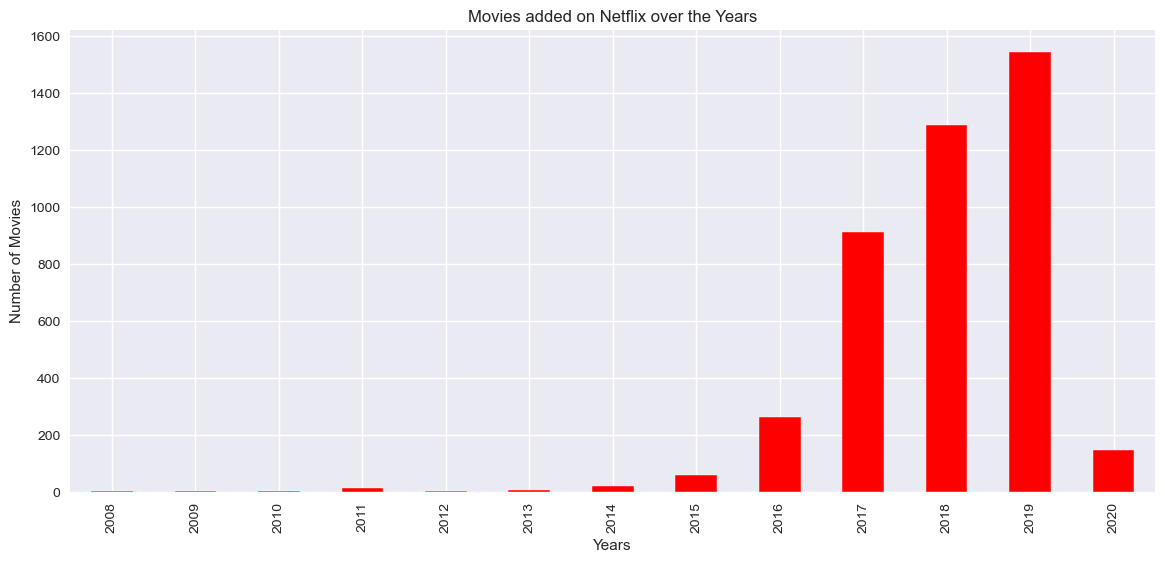

In [116]:

plt.figure(figsize=(14,6))
netflix_data_df[netflix_data_df["entertainment_type"]=="Movie"]["year_added"].value_counts(sort=False).sort_index().plot(kind="bar",color="Red")
plt.title("Movies added on Netflix over the Years")
plt.xlabel("Years")
plt.ylabel("Number of Movies")

plt.show()

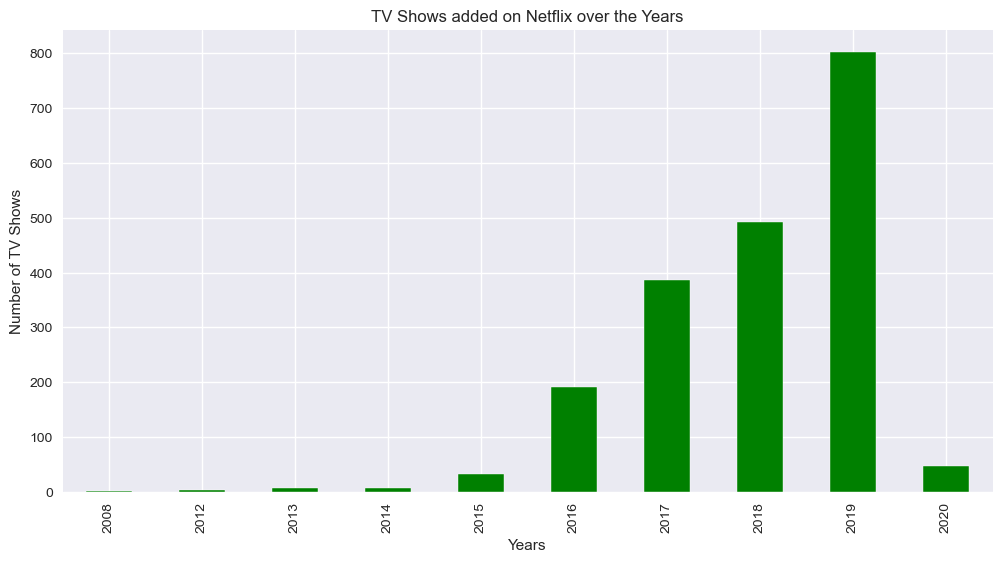

In [118]:
plt.figure(figsize=(12,6))
netflix_data_df[netflix_data_df["entertainment_type"]=="TV Show"]["year_added"].value_counts(sort=False).sort_index().plot(kind="bar",color="Green")
plt.title("TV Shows added on Netflix over the Years")
plt.xlabel("Years")
plt.ylabel("Number of TV Shows")
plt.show()

## Analyzing Entertainment Types - Movies / TV Shows

In [119]:
netflix_type_count= netflix_data_df.groupby(["entertainment_type"])["entertainment_type"].count()
netflix_type_count


entertainment_type
Movie      4265
TV Show    1969
Name: entertainment_type, dtype: int64

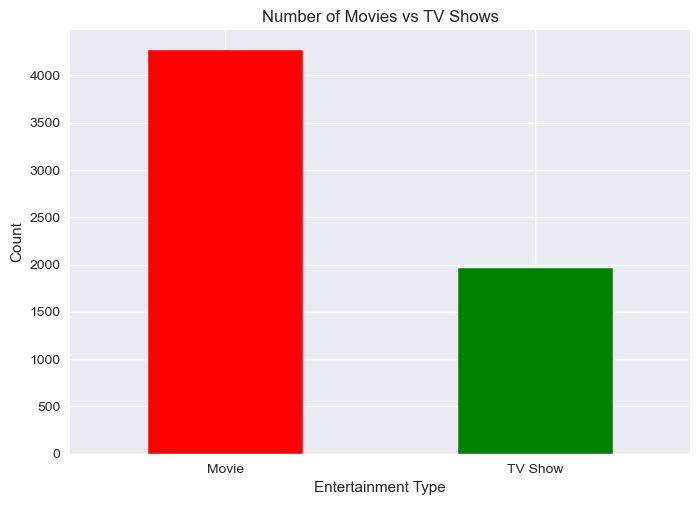

In [120]:
netflix_type_count.plot(x = "entertainment_type", y = "entertainment_type", kind = "bar", color=["Red", "Green"]) 
plt.title("Number of Movies vs TV Shows")
plt.xlabel("Entertainment Type")
plt.xticks(rotation="horizontal")
plt.ylabel("Count")
plt.show()



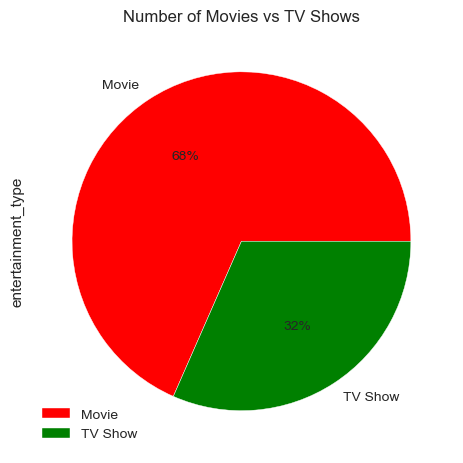

In [123]:
#2nd visual for entertainment type
netflix_type_count.plot.pie(autopct='%1.0f%%' , colors = ['red', 'green'])

plt.title("Number of Movies vs TV Shows")
plt.legend()
plt.show()

### Observations on Data Types: 

### hh

## Analyzing Entertainment Type Based on Rating

[Text(0, 0, 'TV-PG'),
 Text(1, 0, 'TV-MA'),
 Text(2, 0, 'TV-Y7-FV'),
 Text(3, 0, 'TV-Y7'),
 Text(4, 0, 'TV-14'),
 Text(5, 0, 'R'),
 Text(6, 0, 'TV-Y'),
 Text(7, 0, 'NR'),
 Text(8, 0, 'PG-13'),
 Text(9, 0, 'TV-G'),
 Text(10, 0, 'PG'),
 Text(11, 0, 'G'),
 Text(12, 0, 'UR'),
 Text(13, 0, 'NC-17')]

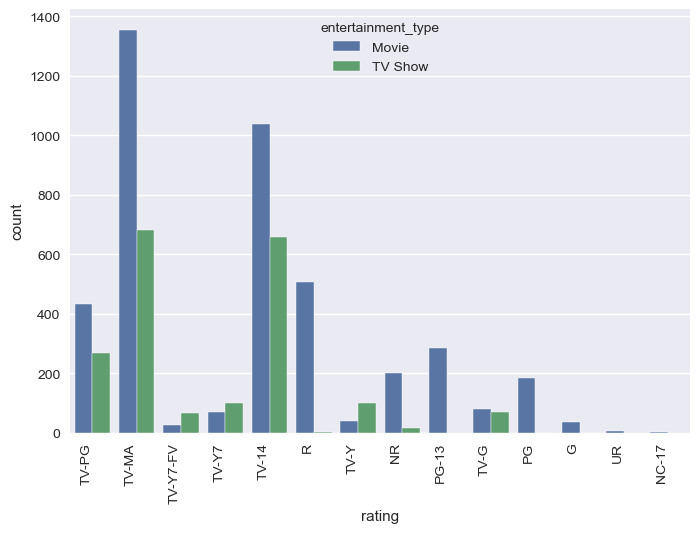

In [124]:
chart = sns.countplot(x='rating',data = netflix_data_df, hue="entertainment_type")

chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=90, 
    horizontalalignment='right',
    fontweight='light'
)

## Analyzing Data Based on Year Released vs Year Added on Netflix

<AxesSubplot:xlabel='release_year', ylabel='year_added'>

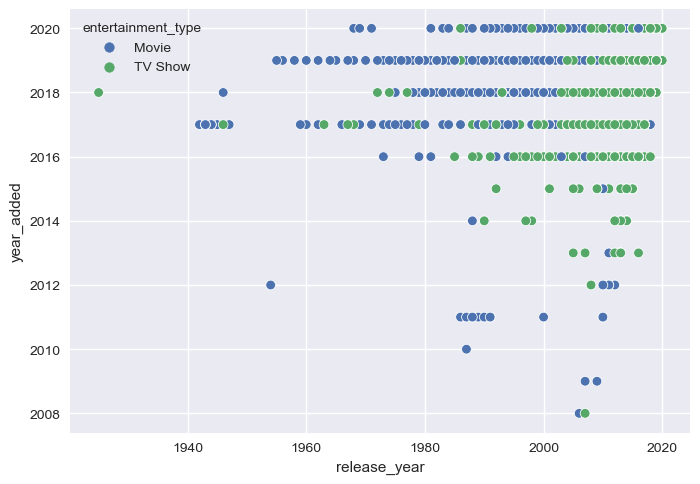

In [125]:

sns.scatterplot(data=netflix_data_df, x="release_year", y="year_added", hue=('entertainment_type'))

<AxesSubplot:xlabel='year_added', ylabel='rating'>

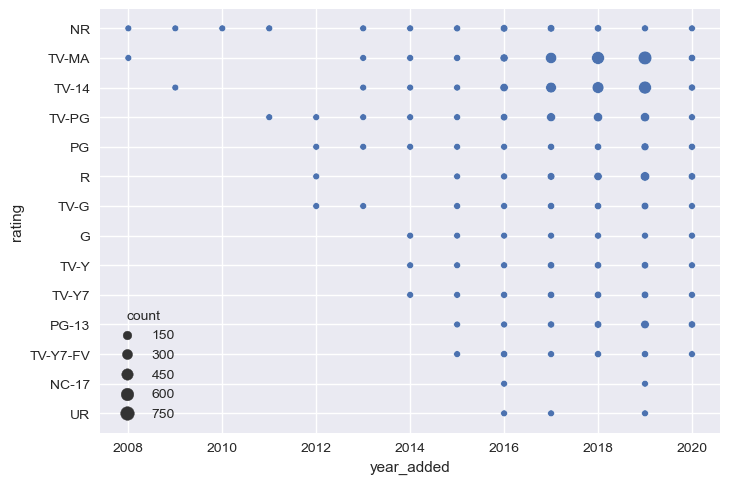

In [126]:
scatter_df = netflix_data_df.groupby(["year_added","rating"]).size().reset_index(name="count")
scatter_df

sns.scatterplot(data=scatter_df, x="year_added", y="rating", size="count")

In [127]:
top_listed_genre = netflix_data_df.set_index('title').genre.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
top_listed_genre


title
Norm of the North: King Sized Adventure        Children & Family Movies
Norm of the North: King Sized Adventure                        Comedies
Jandino: Whatever it Takes                              Stand-Up Comedy
Transformers Prime                                             Kids' TV
Transformers: Robots in Disguise                               Kids' TV
                                                         ...           
A Young Doctor's Notebook and Other Stories            British TV Shows
A Young Doctor's Notebook and Other Stories                 TV Comedies
A Young Doctor's Notebook and Other Stories                   TV Dramas
Friends                                               Classic & Cult TV
Friends                                                     TV Comedies
Length: 13670, dtype: object

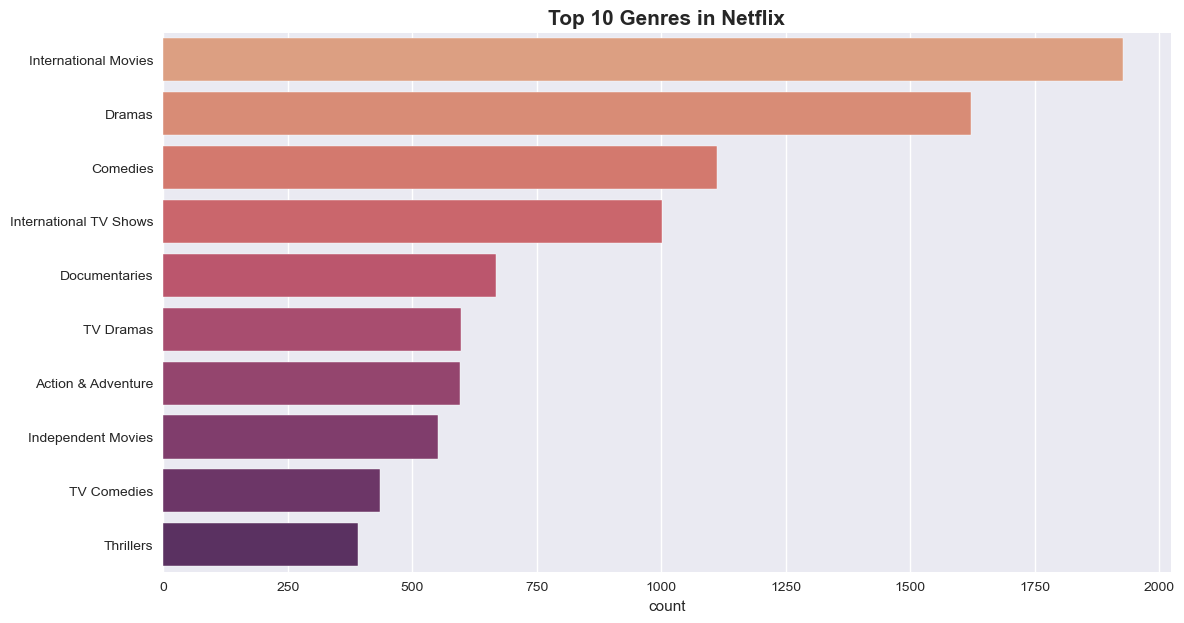

In [128]:
plt.figure(figsize=(13,7))
plt.title('Top 10 Genres in Netflix', fontsize=15, fontweight='bold')

sns.set_style(style='white')

sns.countplot(y = top_listed_genre, order=top_listed_genre.value_counts().head(10).index[:], palette='flare');

In [129]:
release_year_df= netflix_data_df.groupby(["release_year"])["release_year"].count()
release_year_df

release_year
1925       1
1942       2
1943       3
1944       3
1945       3
        ... 
2016     830
2017     959
2018    1063
2019     843
2020      25
Name: release_year, Length: 72, dtype: int64

In [130]:
netflix_genre_count= netflix_data_df.groupby(["genre"])["genre"].count()
netflix_genre_count

genre
Action & Adventure                                              68
Action & Adventure, Anime Features, Children & Family Movies     1
Action & Adventure, Anime Features, Classic Movies               1
Action & Adventure, Anime Features, Horror Movies                1
Action & Adventure, Anime Features, International Movies        25
                                                                ..
TV Horror, TV Mysteries, Teen TV Shows                           1
TV Horror, Teen TV Shows                                         1
TV Sci-Fi & Fantasy, TV Thrillers                                1
TV Shows                                                        10
Thrillers                                                       40
Name: genre, Length: 461, dtype: int64

## Analyze the Top 10 Genres on Netflix

In [131]:
netflix_genre=netflix_data_df['genre'].value_counts().nlargest(10)
netflix_genre

Documentaries                                       299
Stand-Up Comedy                                     273
Dramas, International Movies                        248
Dramas, Independent Movies, International Movies    186
Comedies, Dramas, International Movies              174
Kids' TV                                            159
Documentaries, International Movies                 150
Children & Family Movies, Comedies                  129
Children & Family Movies                            120
Comedies, International Movies                      120
Name: genre, dtype: int64

Text(0.5, 1.0, 'Top 10 Genres of Movies')

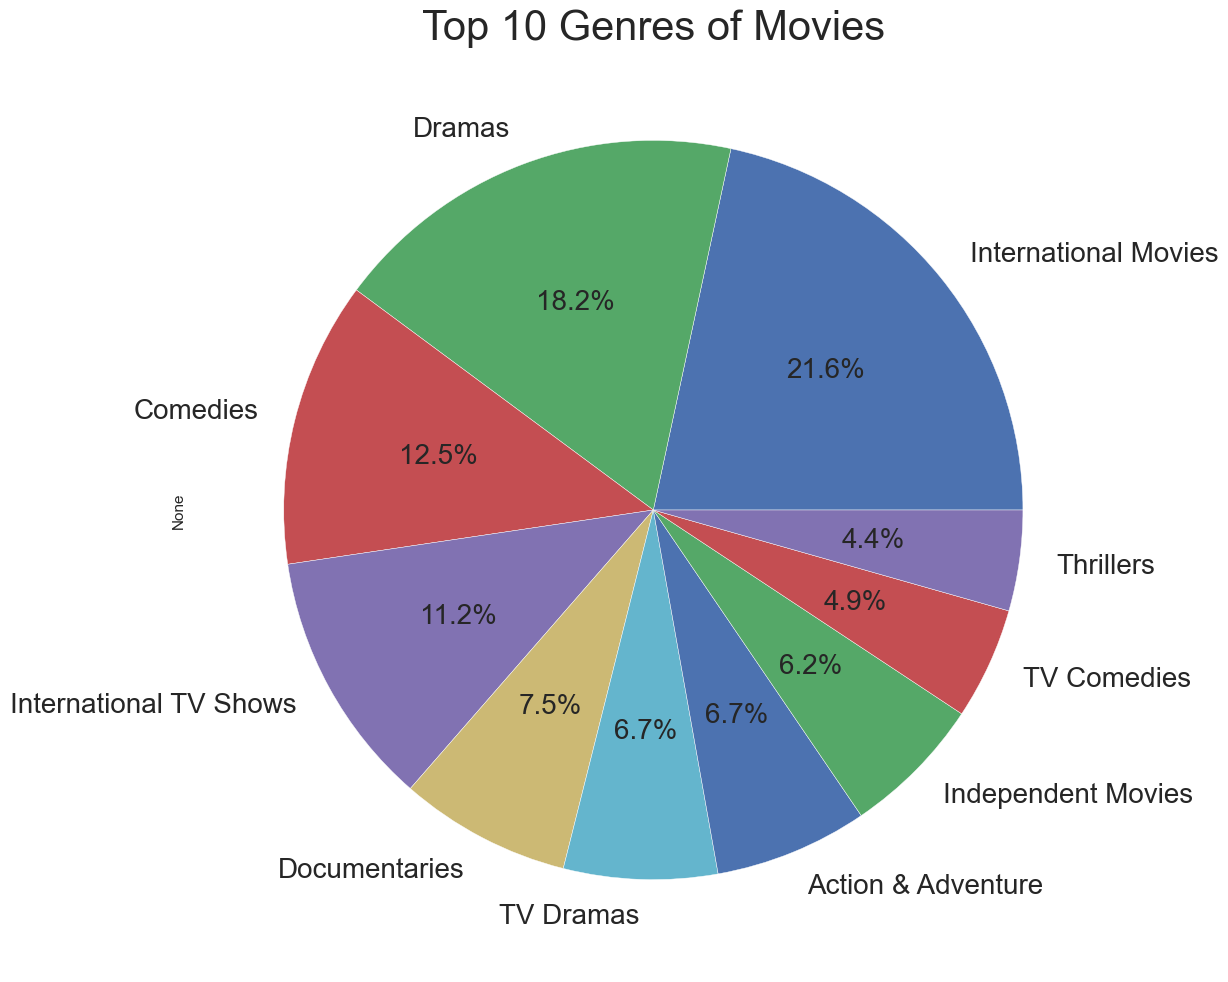

In [132]:
#top_listed_genre.plot.pie(autopct='%1.1f%%', figsize=(20, 35), textprops={'fontsize': 20})
top_listed_genre.value_counts().head(10).plot.pie(autopct='%1.1f%%', figsize=(12, 12), textprops={'fontsize': 20})
plt.title("Top 10 Genres of Movies", size=30)

## Analyze Netflix Content Growth Over The Years

In [133]:
year_data = netflix_data_df['year_added'].value_counts().sort_index()
year_data

2008       2
2009       2
2010       1
2011      13
2012       7
2013      12
2014      25
2015      90
2016     456
2017    1300
2018    1782
2019    2349
2020     195
Name: year_added, dtype: int64

In [134]:
type_data = netflix_data_df.groupby('year_added')['entertainment_type'].value_counts().unstack().fillna(0)
type_data

entertainment_type,Movie,TV Show
year_added,,
2008,1.0,1.0
2009,2.0,0.0
2010,1.0,0.0
2011,13.0,0.0
2012,4.0,3.0
2013,6.0,6.0
2014,19.0,6.0
2015,58.0,32.0
2016,264.0,192.0


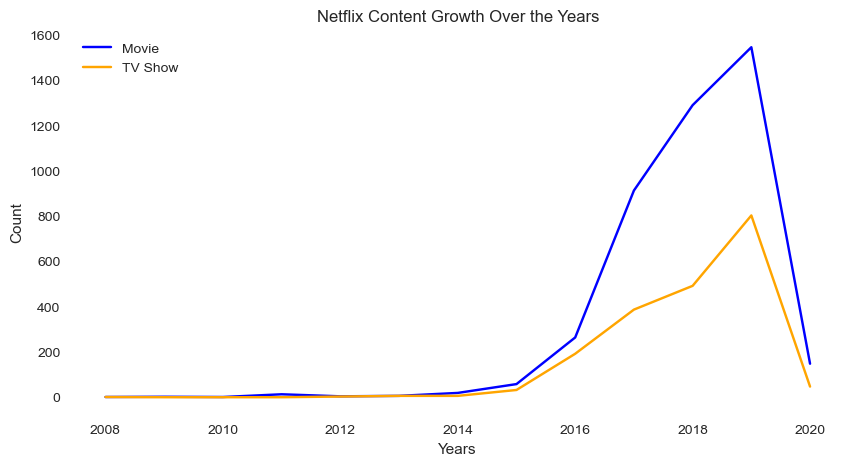

In [135]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(type_data['Movie'], color='blue', label='Movie')
ax.plot(type_data['TV Show'], color='orange', label='TV Show')
plt.legend(loc="upper left")
plt.title('Netflix Content Growth Over the Years')
plt.xlabel("Years")
plt.ylabel("Count")
plt.show()

In [136]:
netflix_df_movies_only = netflix_data_df[netflix_data_df["entertainment_type"] == "Movie"]

In [138]:
netflix_df_shows_only = netflix_data_df[netflix_data_df["entertainment_type"] == "TV Show"]

In [140]:
netflix_data_df.info
netflix_data_df.nunique


most_titles_produced = netflix_data_df.groupby('country').count().sort_values('title',ascending=False).head(10)

most_titles_produced.reset_index(inplace=True)
most_titles_produced


,country,show_id,entertainment_type,title,release_year,rating,duration,genre,year_added,imdb_rating
0,United States,2508,2508,2508,2508,2508,2508,2508,2508,338
1,India,777,777,777,777,777,777,777,777,108
2,United Kingdom,348,348,348,348,348,348,348,348,40
3,Japan,176,176,176,176,176,176,176,176,21
4,Canada,141,141,141,141,141,141,141,141,10
5,South Korea,136,136,136,136,136,136,136,136,20
6,Spain,117,117,117,117,117,117,117,117,10
7,France,90,90,90,90,90,90,90,90,10
8,Mexico,83,83,83,83,83,83,83,83,8
9,Turkey,79,79,79,79,79,79,79,79,9


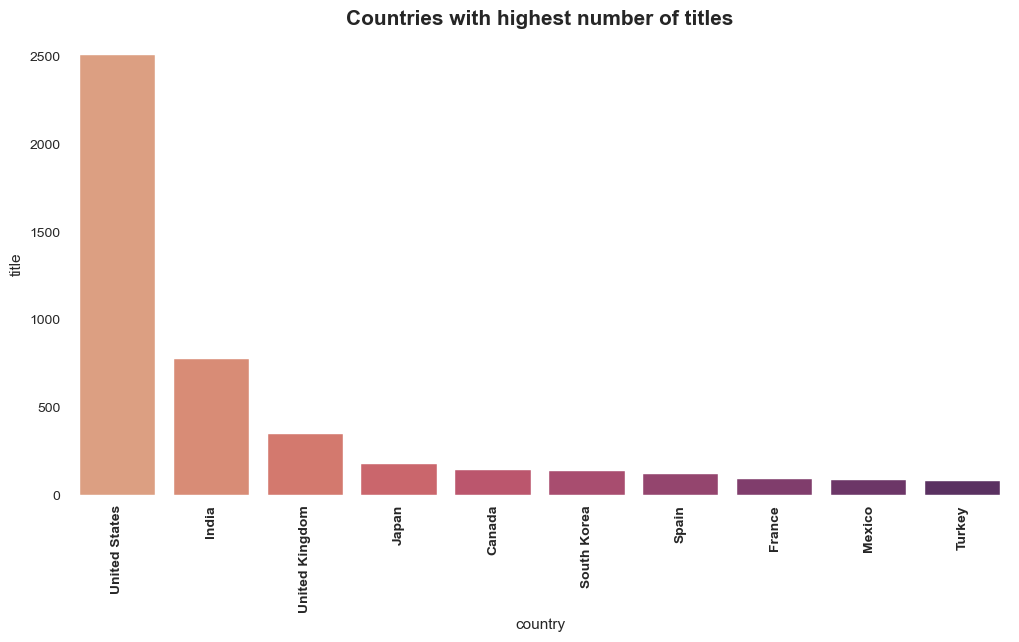

In [141]:
from matplotlib import gridspec

fig = plt.figure(figsize=(20, 6))
gs = gridspec.GridSpec(nrows=1, ncols=2, height_ratios=[6], width_ratios=[10, 5])

ax = plt.subplot(gs[0])

sns.barplot(x=most_titles_produced.country, y=most_titles_produced.title, data=most_titles_produced, palette="flare")
#hue colors: Movies and TV

ax.set_xticklabels(most_titles_produced.country, fontweight='bold', rotation='90')
ax.set_title('Countries with highest number of titles', fontsize=15, fontweight='bold');


Text(0.5, 1.0, 'Countries with highest number of titles\n')

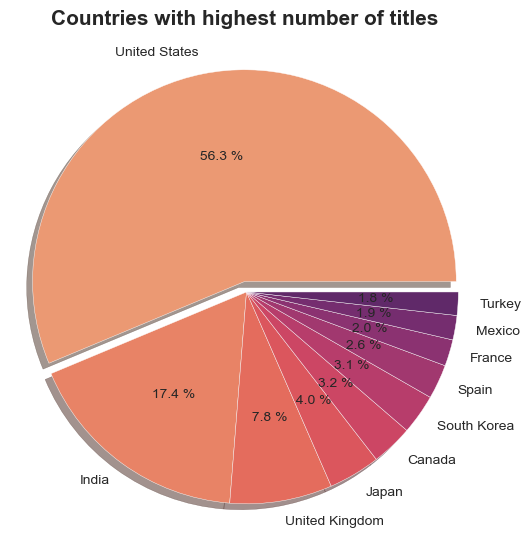

In [142]:
fig = plt.figure(figsize=(20, 6))
gs = gridspec.GridSpec(nrows=1, ncols=2, height_ratios=[6], width_ratios=[10, 5])

explode = [0 for _ in range(10)]
explode[0] = 0.05

ax2 = plt.subplot(gs[1])

labels = most_titles_produced.country
sizes = most_titles_produced.title 

ax2.pie(sizes, labels=labels, shadow=True, startangle=0, autopct ='% 1.1f %%', explode=explode, colors=sns.color_palette("flare", n_colors=10))
ax2.axis('equal')

ax2.set_title('Countries with highest number of titles\n', fontsize=15, fontweight='bold')


Text(0.5, 1.0, 'Key Words in Movie Titles\n')

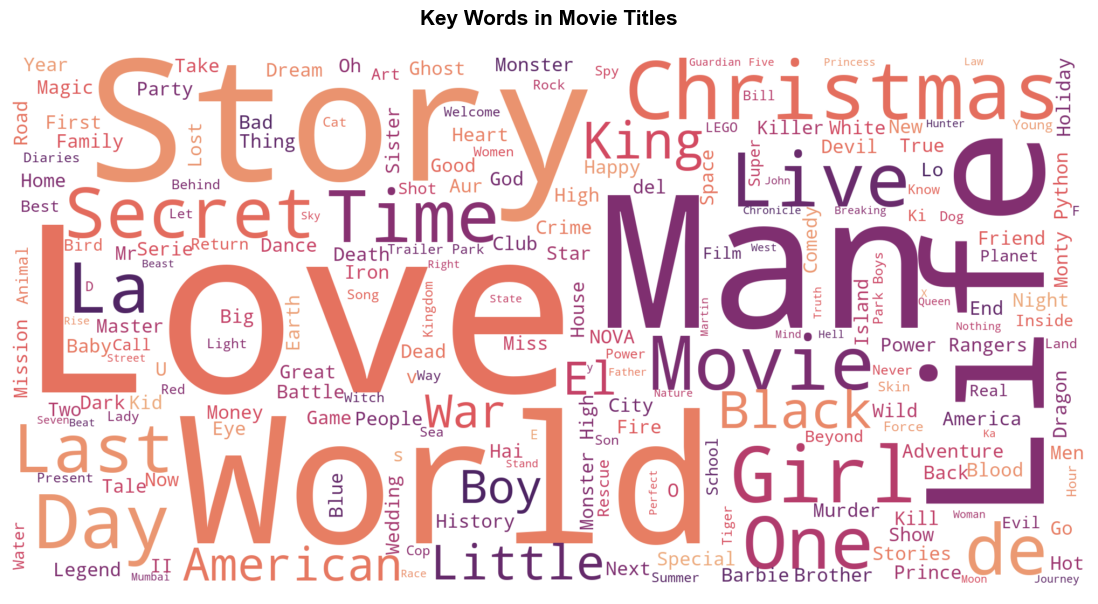

In [143]:
#use wordcloud to represent text data in which the size of each word indicates its frequency or importance.

plt.style.use('seaborn')

from PIL import Image

words = netflix_data_df["title"].str.split("(").str[0].value_counts().keys()

word_cloud = WordCloud(stopwords=STOPWORDS,scale=5,max_words=1000,colormap="flare",background_color="white").generate(" ".join(words))

plt.figure(figsize=(15,7))
plt.imshow(word_cloud,interpolation="bilinear")
plt.axis("off")
plt.title("Key Words in Movie Titles\n",color='black',fontsize=15, fontweight='bold')


In [146]:
netflix_data_df[netflix_data_df.entertainment_type == 'Movie'].duration.head()

0     90
1     94
4     99
6    110
7     60
Name: duration, dtype: object

In [147]:
def to_minutes (series):
    return series.split()[0]
    
        
netflix_data_df['duration'] = netflix_data_df.duration.apply(lambda x: to_minutes(x))

netflix_data_df[netflix_data_df.entertainment_type == 'Movie'].duration.head()


0     90
1     94
4     99
6    110
7     60
Name: duration, dtype: object

In [148]:
netflix_data_df['duration'] = netflix_data_df.duration.astype('int')

In [150]:
netflix_data_df[netflix_data_df.entertainment_type == 'Movie'].duration.mean()

#The average duration for all movies released on Netflix is ~ 99 minutes.

99.10082063305978

In [151]:
duration_by_year = netflix_data_df[netflix_data_df.entertainment_type == 'Movie'][['duration', 'release_year']]
duration_by_year

,duration,release_year
0,90,2019
1,94,2016
4,99,2017
6,110,2014
7,60,2017
...,...,...
5577,70,2007
5578,102,2015
5579,88,2014
5580,109,2015


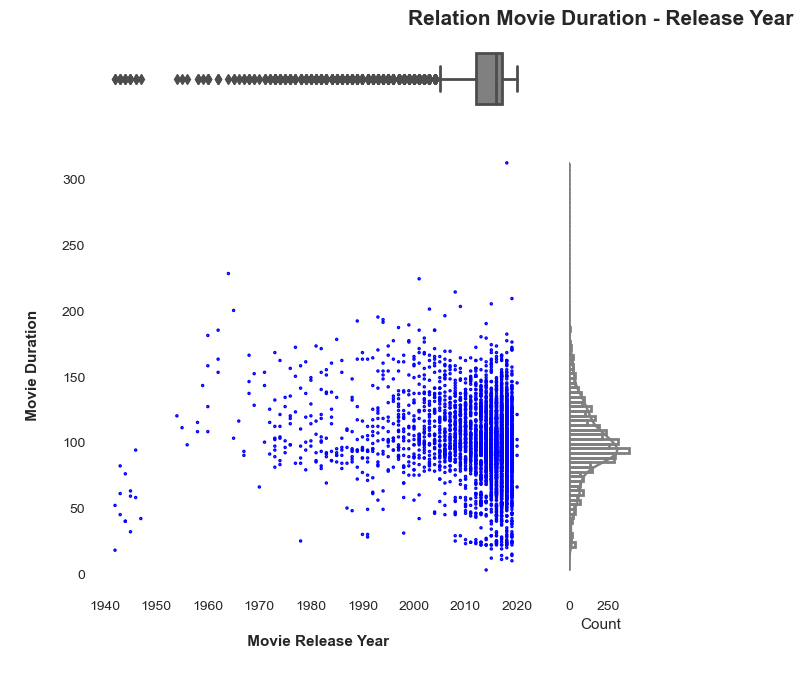

In [153]:
sns.set_style(style='white')

g = sns.JointGrid(marginal_ticks=True, space=0.5, palette='flare')
x, y = duration_by_year.release_year, duration_by_year.duration
sns.scatterplot(x=x, y=y, ec="b", fc="none", s=1, linewidth=1.5, ax=g.ax_joint) #marginal_ticks=True)
sns.histplot(y=y, fill=False, linewidth=2, ax=g.ax_marg_y, kde=True, color = 'grey')
sns.boxplot(x=x, linewidth=2, ax=g.ax_marg_x, color='grey')

g.ax_joint.set_xlabel('\n Movie Release Year\n', fontweight='bold')
g.ax_joint.set_ylabel('\n Movie Duration\n', fontweight='bold')

g.ax_marg_x.get_yticklabels()
g.ax_marg_y.get_xticklabels()

plt.title('Relation Movie Duration - Release Year\n\n\n\n\n', fontsize=15, fontweight='bold');

In [162]:
#Top 10 movies IMDB ratings
netflix_data_df.loc[netflix_data_df["imdb_rating"].notnull()].loc[netflix_data_df["imdb_rating"] != "N/A"].sort_values(by="imdb_rating",ascending=False).reset_index(drop=True).head(10)

,show_id,entertainment_type,title,country,release_year,rating,duration,genre,year_added,imdb_rating
0,80191075,TV Show,Equestria Girls: Tales of Canterlot High,"United States, Canada",2017,TV-Y,1,"Kids' TV, TV Comedies",2017,9.3
1,70204970,TV Show,DEATH NOTE,Japan,2006,TV-14,1,"Anime Series, Crime TV Shows, International TV...",2016,9.0
2,80113144,TV Show,StoryBots Super Songs,United States,2016,TV-Y,1,Kids' TV,2016,8.8
3,81200228,TV Show,The Untamed,China,2019,TV-14,1,"International TV Shows, TV Action & Adventure,...",2019,8.8
4,81004113,TV Show,Age of Rebellion,Taiwan,2018,TV-MA,1,"Crime TV Shows, International TV Shows, TV Dramas",2018,8.6
5,80189221,TV Show,The Haunting of Hill House,United States,2018,TV-MA,1,"TV Dramas, TV Horror, TV Mysteries",2018,8.6
6,81197399,TV Show,"Wait, My Youth",United States,2019,TV-PG,1,"International TV Shows, Romantic TV Shows, Tee...",2019,8.6
7,70170051,Movie,Senna,"United Kingdom, France, United States",2010,PG-13,106,"Documentaries, International Movies, Sports Mo...",2019,8.5
8,81142594,TV Show,Tunnel,United States,2019,TV-MA,1,"Crime TV Shows, International TV Shows, TV Dramas",2019,8.5
9,80223685,TV Show,Daniel Sloss: Live Shows,United States,2018,TV-MA,1,"Stand-Up Comedy & Talk Shows, TV Comedies",2018,8.5


In [163]:
#Top 10 movies IMDB ratings
netflix_data_df.loc[netflix_data_df["imdb_rating"].notnull()].loc[netflix_data_df["imdb_rating"] != "N/A"].sort_values(by="imdb_rating",ascending=False).reset_index(drop=True).tail(10)

,show_id,entertainment_type,title,country,release_year,rating,duration,genre,year_added,imdb_rating
787,81024729,Movie,Nasha,India,2013,TV-MA,115,"Dramas, International Movies, Romantic Movies",2018,3.2
788,81147293,Movie,A Haunting at Silver Falls: The Return,United States,2019,TV-14,80,"Horror Movies, Independent Movies",2019,3.2
789,80201824,Movie,A Scandall,India,2016,TV-MA,108,"International Movies, Thrillers",2017,3.1
790,80201823,Movie,One Night Stand,India,2016,TV-MA,93,"Dramas, International Movies, Music & Musicals",2017,3.1
791,80211135,Movie,Kajraare,India,2010,TV-14,113,"Dramas, International Movies, Music & Musicals",2017,3.0
792,70123116,Movie,Agyaat,India,2009,TV-MA,97,"Horror Movies, International Movies",2018,3.0
793,80239337,TV Show,Ben 10,United States,2016,TV-Y7,1,Kids' TV,2018,2.9
794,80992496,Movie,China Salesman,China,2017,TV-MA,111,"Action & Adventure, International Movies",2018,2.8
795,80111273,TV Show,Game Winning Hit,Taiwan,2009,TV-PG,1,"International TV Shows, TV Comedies, TV Dramas",2016,2.3
796,70109884,Movie,Karzzzz,India,2008,TV-14,137,"International Movies, Music & Musicals, Romant...",2017,2.3
